In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
folder_path = '/content/drive/MyDrive/I m besides you task'
os.listdir(folder_path)

['transcripts-20240903T095324Z-001',
 'transcript_data-20240903T095252Z-001',
 'emotion_data-20240903T095158Z-001']

The document presents a code snippet using Python and Pandas for reading emotion-related data from multiple CSV files stored in subdirectories. It systematically iterates through directories labeled 1 to 10, loading types of data: emotional data, gaze data, and metadata, transcript data, while organizing them into separate data structures. This approach demonstrates a structured methodology for data handling in machine learning or data analysis tasks.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

import libraries

In [325]:

data_emo = {}
data_gaze_old={}
data_meta={}


In [326]:


for i in range(0,10):
  dir=f'{i+1}'
  file_path= os.path.join(folder_path, 'emotion_data-20240903T095158Z-001', 'emotion_data', dir, 'emotion.csv')
  f2=  os.path.join(folder_path, 'emotion_data-20240903T095158Z-001', 'emotion_data', dir, 'gaze.csv')
  f3=  os.path.join(folder_path, 'emotion_data-20240903T095158Z-001', 'emotion_data', dir, 'metadata.csv')

  data_emo[f'cand_{i+1}'] = pd.read_csv(file_path)
  data_gaze_old[f'cand_{i+1}'] = pd.read_csv(f2)
  data_meta[f'cand_{i+1}'] = pd.read_csv(f3)







upload emotion data make a dataset

In [ ]:
import os
import pandas as pd

# Initialize dictionaries to store data
data_gaze = {}

# Define the folder path (update with actual path if needed)
folder_path = '/content/drive/MyDrive/I m besides you task'

# Process each candidate's gaze data
for i in range(10):
    dir = f'{i+1}'
    file_path = os.path.join(folder_path, 'emotion_data-20240903T095158Z-001', 'emotion_data', dir, 'gaze.csv')

    # Load the gaze data for the candidate
    gaze_data = pd.read_csv(file_path)

    # Calculate median of eye offset and mean of gaze mean
    eye_offset_median = gaze_data['eye_offset'].median()
    gaze_mean = gaze_data['gaze'].mean()
    blink_total = gaze_data['blink'].mean()  # Assuming 'blink' is a count of blinks

    # Store the processed data
    data_gaze[f'cand_{i+1}'] = {
        'candidate_id': i+1,
        'blink': blink_total,
        'gaze': gaze_mean,
        'eye_offset': eye_offset_median
    }

# Convert the data to a DataFrame
gaze_final_df = pd.DataFrame(data_gaze.values())



This code snippet processes gaze data for 10 candidates. It iterates through each candidate's data, calculates the median eye_offset and mean gaze, and stores the processed data in a dictionary called data_gaze.

In [281]:
import os
import pandas as pd

# List of emotion features to apply the transformation on
emotion_features = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise']

# Function to apply the transformation
def transform_emotions(row):
    neutral_value = row['neutral']
    for feature in emotion_features:
        # Avoid division by zero by checking if neutral_value is not 100
        if neutral_value != 100:
            row[f'{feature}_transformed'] = 100 * row[feature] / (100 - neutral_value)
        else:
            row[f'{feature}_transformed'] = row[feature]  # Keep the value the same if neutral is 100
    return row

# Initialize an empty list to collect all candidate data
all_candidates_data = []

# Iterate over each candidate's data and apply the transformations
for i in range(0, 10):
    dir = f'{i+1}'
    file_path = os.path.join(folder_path, 'emotion_data-20240903T095158Z-001', 'emotion_data', dir, 'emotion.csv')

    # Load the candidate's emotion data
    candidate_emotion_data = pd.read_csv(file_path)

    # Apply the transformation function to each row
    candidate_emotion_data = candidate_emotion_data.apply(transform_emotions, axis=1)

    # List of transformed emotion features
    transformed_features = [f'{feature}_transformed' for feature in emotion_features]

    # Drop original emotion columns (keep only the transformed ones and relevant IDs)
    candidate_emotion_transformed = candidate_emotion_data[['movie_id', 'image_seq'] + transformed_features]

    # Create a new column for the dominant transformed emotion
    candidate_emotion_transformed['dominant_emotion_transformed'] = candidate_emotion_transformed[transformed_features].idxmax(axis=1)

    # Map the transformed feature names back to emotion names
    candidate_emotion_transformed['dominant_emotion_transformed'] = candidate_emotion_transformed['dominant_emotion_transformed'].str.replace('_transformed', '')

    # Add a column for candidate ID
    candidate_emotion_transformed['candidate_id'] = i + 1

    # Append the transformed data for this candidate to the list
    all_candidates_data.append(candidate_emotion_transformed)

# Concatenate all the candidate data into a single DataFrame
combined_data = pd.concat(all_candidates_data, ignore_index=True)






<ipython-input-281-1b99df3938c2>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidate_emotion_transformed['dominant_emotion_transformed'] = candidate_emotion_transformed[transformed_features].idxmax(axis=1)
<ipython-input-281-1b99df3938c2>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidate_emotion_transformed['dominant_emotion_transformed'] = candidate_emotion_transformed['dominant_emotion_transformed'].str.replace('_transformed', '')
<ipython-input-281-1b99df3938c2>:45: SettingWithCopyWarni

**Emotion Transformation and Analysis**

This code transforms emotion scores for 10 candidates by adjusting for the neutral emotion effect, highlighting true emotional dynamics. Each candidate's dominant transformed emotion is identified and compiled into a combined dataset for further analysis, providing refined insights into emotional expressions.

---


Transformation of Emotion Scores:

The emotion features (angry, disgust, fear, happy, sad, surprise) are adjusted using the formula:
Transformed Emotion
=
Emotion Score
×
100/
(
100
−
Neutral Score
)


This adjustment accounts for the influence of the neutral emotion and avoids distortion when neutral scores are high.


In [282]:
Combined_emotion=combined_data.copy()

In [ ]:
combined_data.shape

(747, 10)

In [ ]:
print(data_emo['cand_1'].shape)
print(data_gaze['cand_1'].shape)
print(data_meta['cand_1'].shape)

(87, 10)
(88, 5)
(30, 6)


In [ ]:
data_gaze['cand_1'].columns

Index(['movie_id', 'image_seq', 'gaze', 'blink', 'eye_offset'], dtype='object')

In [299]:

# Assuming your CSV files are in a folder called 'data' within your current directory
data_folder = '/content/drive/MyDrive/I m besides you task/transcript_data-20240903T095252Z-001/transcript_data'  # Replace with your actual folder path

# Initialize an empty dictionary to store the dataframes
transcript_data = {}
tf_d={}
sentiment_data = {}
speech_speed_data = {}

# Iterate through the files in the folder
for filename in os.listdir(data_folder):
  if filename.endswith(".csv"):
    file_path = os.path.join(data_folder, filename)
    df=pd.read_csv(file_path)
    # Extract the candidate name from the filename (assuming the filename is in the format "candidate_1.csv")
    candidate_name = filename.split(".")[0]
    emotions = df[['confident', 'hesitant', 'concise', 'enthusiastic']].mean()
    speech_speed=df['speech_speed'].mean()

    sentiment= df[['positive', 'negative', 'neutral']].mean()
    sentiment_data[candidate_name] = sentiment
    speech_speed_data[candidate_name]=speech_speed

    tf_d[candidate_name]=emotions
    # Store the dataframe in the dictionary with the candidate name as the key
    transcript_data[candidate_name] = df




The code processes transcript data from multiple CSV files for different candidates. It extracts and calculates the average values of specific emotion features (e.g., confident, hesitant, concise, enthusiastic), speech speed, and sentiment scores (positive, negative, neutral) for each candidate. The results are stored in dictionaries with the candidate's name as the key, making it easier to analyze and compare the candidates' performance based on their emotional expression, sentiment, and speech speed.

In [302]:
transcript_emo = pd.DataFrame(tf_d).T
transcript_emo.reset_index(inplace=True)
transcript_emo.rename(columns={'index': 'candidate_id'}, inplace=True)

In [303]:
transcript_emo.head()

candidate_id  confident  hesitant   concise  enthusiastic
0           10   0.619852  0.520637  0.385655      0.325507
1            7   0.703714  0.457070  0.398571      0.463940
2            6   0.679755  0.490252  0.367792      0.481433
3            1   0.733828  0.485172  0.429418      0.466497
4            3   0.573566  0.604004  0.394715      0.448050

In [ ]:
emotion_tf=pd.DataFrame(tf_d).T
sentiment_df = pd.DataFrame(sentiment_data).T



In [ ]:
speech_speed_data

{'10': 3.2485176794320747,
 '7': 2.2848971482729263,
 '6': 2.583163463330654,
 '1': 3.1137708427658684,
 '3': 3.385636473178966,
 '4': 2.775454072985372,
 '8': 2.9029526215428083,
 '5': 2.8173408196402616,
 '9': 3.3299382716049384,
 '2': 3.269092112382821}

In [ ]:


# Given dictionary
speech_speed_data = {
    '10': 3.2485176794320747,
    '7': 2.2848971482729263,
    '6': 2.583163463330654,
    '1': 3.1137708427658684,
    '3': 3.385636473178966,
    '4': 2.775454072985372,
    '8': 2.9029526215428083,
    '5': 2.8173408196402616,
    '9': 3.3299382716049384,
    '2': 3.269092112382821
}

# Convert the dictionary to a list of dictionaries
data_list = [{'candidate_id': k, 'speech_speed': v} for k, v in speech_speed_data.items()]

# Create the DataFrame
speech_speed_df = pd.DataFrame(data_list)

# Display the DataFrame
print(speech_speed_df)


  candidate_id  speech_speed
0           10      3.248518
1            7      2.284897
2            6      2.583163
3            1      3.113771
4            3      3.385636
5            4      2.775454
6            8      2.902953
7            5      2.817341
8            9      3.329938
9            2      3.269092


In [ ]:
sentiment_df.reset_index(inplace=True)
sentiment_df.rename(columns={'index': 'candidate_id'}, inplace=True)

In [ ]:
print(sentiment_df)

  candidate_id  positive  negative   neutral
0           10  0.589267  0.220948  0.189785
1            7  0.717354  0.140232  0.142414
2            6  0.711182  0.138992  0.149826
3            1  0.709199  0.141214  0.149586
4            3  0.567257  0.264337  0.168406
5            4  0.655748  0.169142  0.175110
6            8  0.605402  0.192292  0.202306
7            5  0.630573  0.187013  0.182414
8            9  0.617353  0.223949  0.158699
9            2  0.722006  0.107541  0.170453


In [ ]:
print(sentiment_df.describe())

        positive   negative    neutral
count  10.000000  10.000000  10.000000
mean    0.652534   0.178566   0.168900
std     0.058600   0.048346   0.019202
min     0.567257   0.107541   0.142414
25%     0.608390   0.140478   0.152044
50%     0.643161   0.178077   0.169430
75%     0.710686   0.213784   0.180588
max     0.722006   0.264337   0.202306


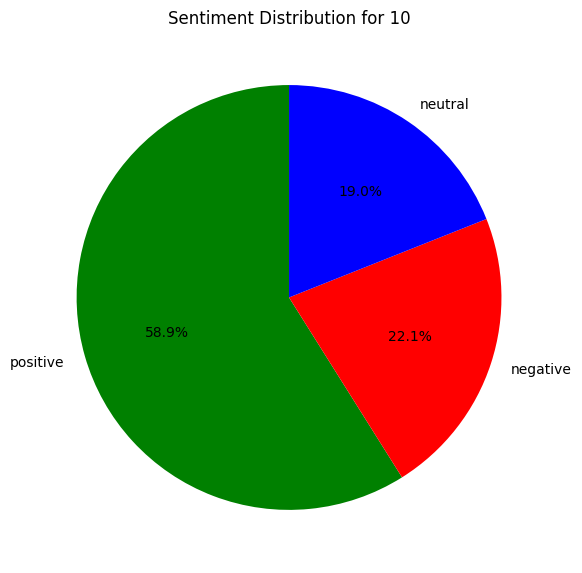

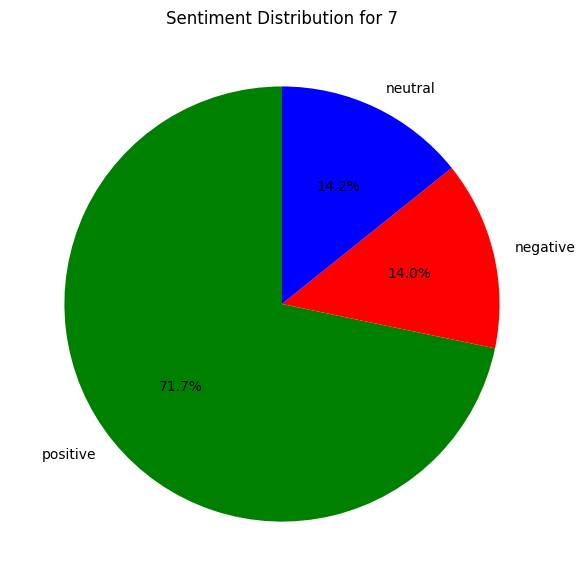

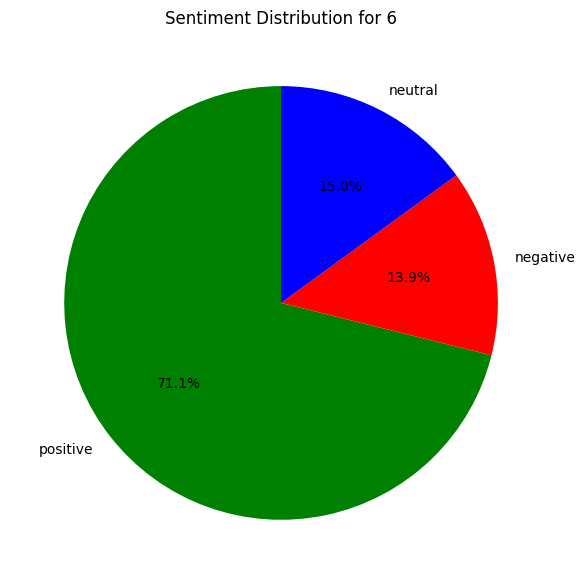

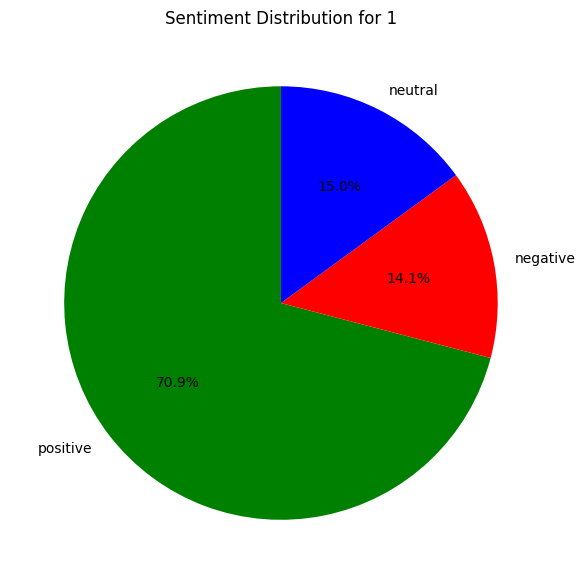

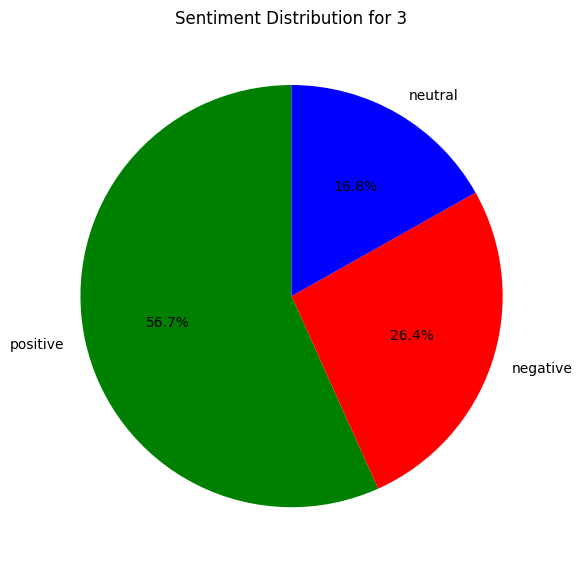

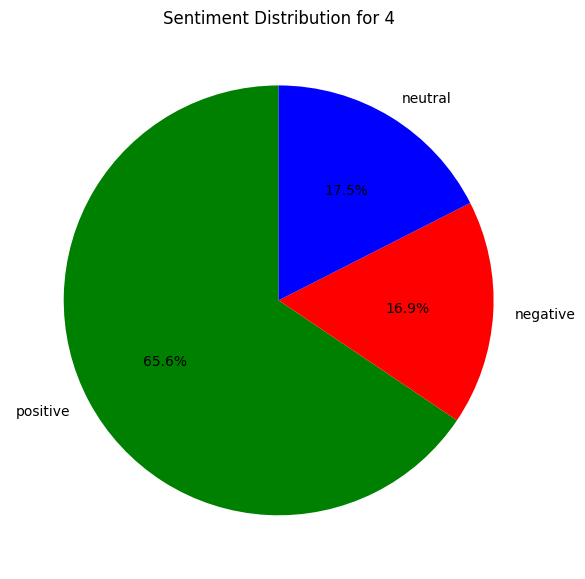

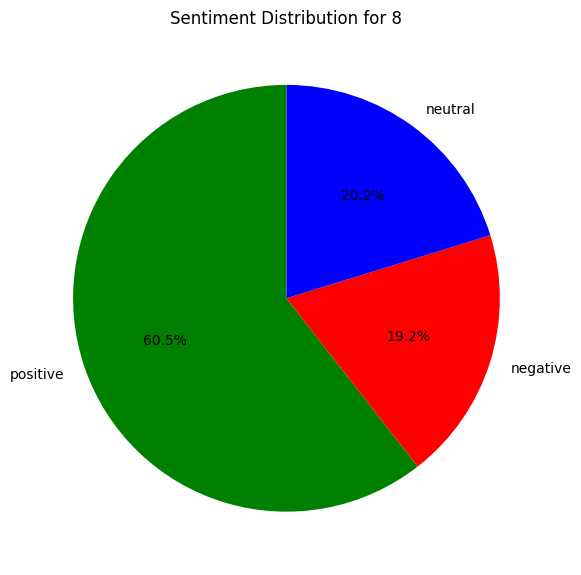

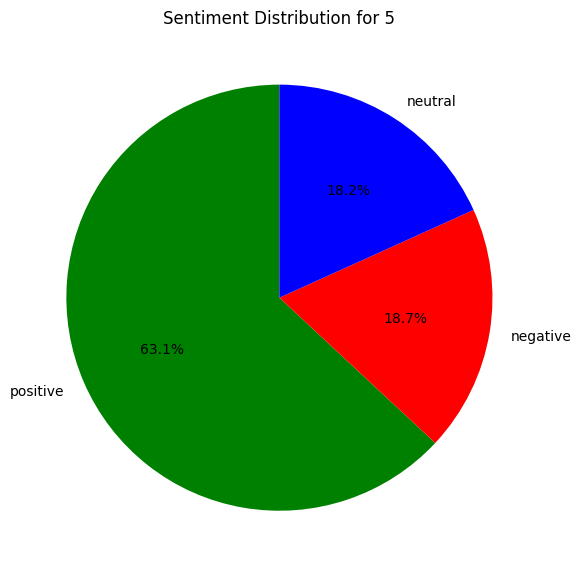

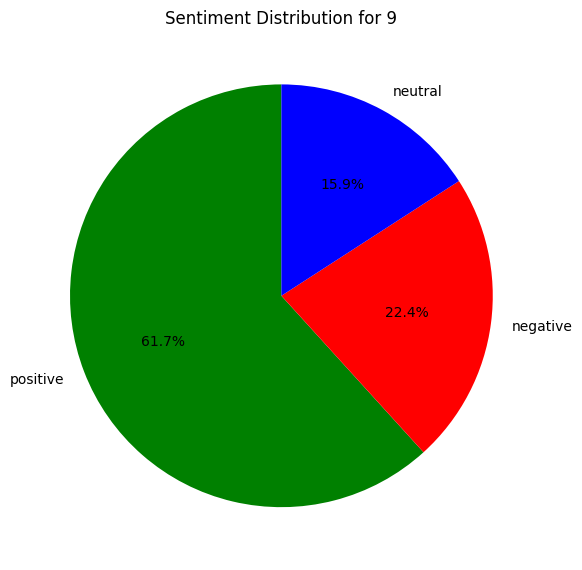

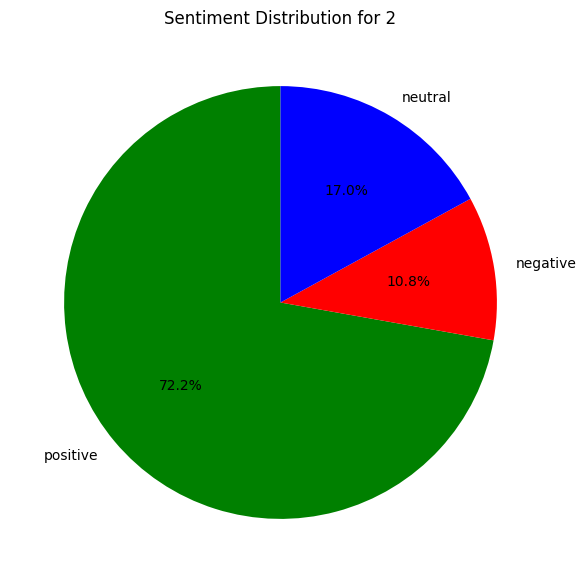

In [ ]:
for candidate in sentiment_df.index:
    plt.figure(figsize=(6, 6))
    sentiment_df.loc[candidate].plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red', 'blue'], startangle=90)
    plt.title(f"Sentiment Distribution for {candidate}")
    plt.ylabel("")  # Hide y-axis label
    plt.tight_layout()
    plt.show()

sentiment analysis using pie chart for each candidate

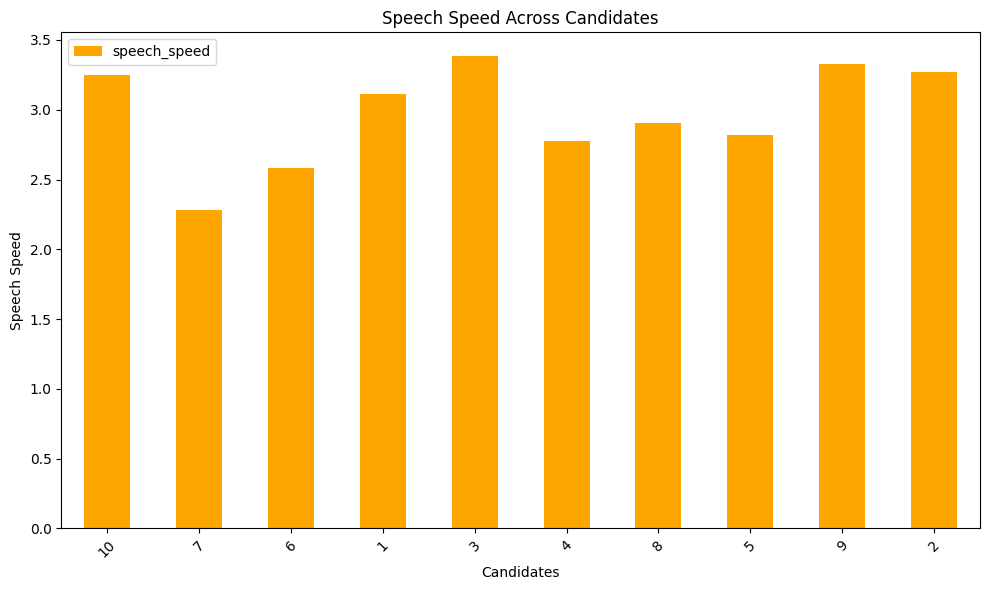

In [ ]:
# Convert dictionary to Pandas Series
ss_df = pd.Series(speech_speed_data)

# If you want to turn it into a DataFrame for further processing:
ss_df = ss_df.to_frame(name='speech_speed')

# Plot the speech speed data (Bar Chart)
ss_df.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title("Speech Speed Across Candidates")
plt.ylabel("Speech Speed")
plt.xlabel("Candidates")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


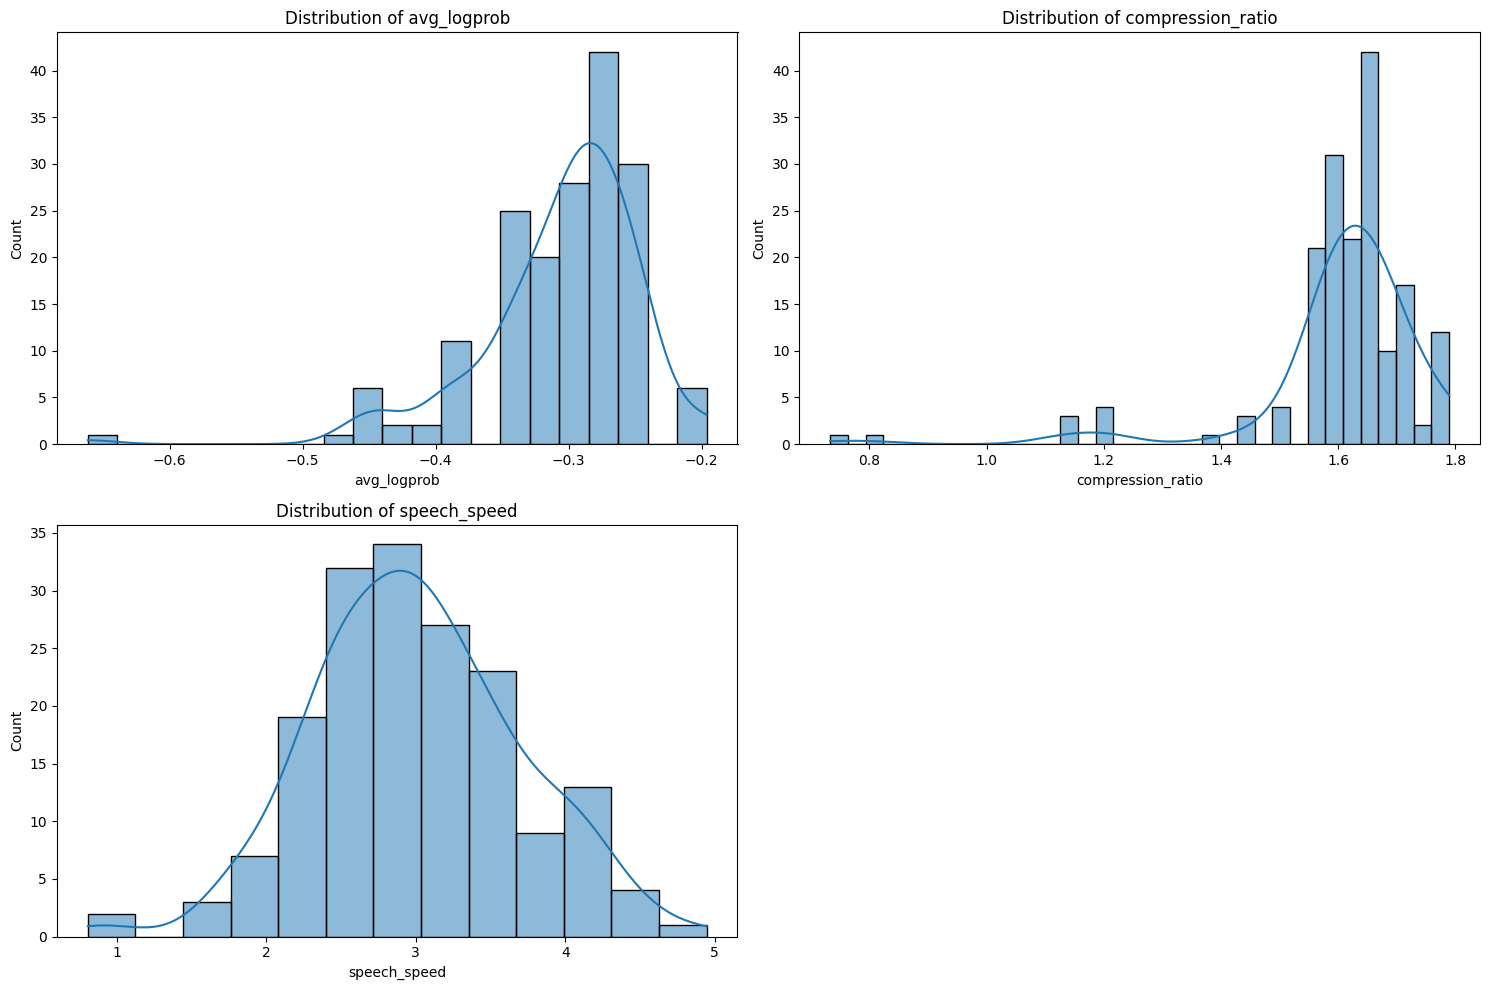

In [284]:


# Assume 'transcript_data' is a dictionary with candidate dataframes
# Combine all data into a single DataFrame for comparison
combined_df = pd.concat(transcript_data.values(), keys=transcript_data.keys(), names=['candidate', 'index'])

# Reset index for easier plotting
combined_df_reset = combined_df.reset_index()

# 1. Distribution Analysis
# Histograms for numerical features
plt.figure(figsize=(15, 10))
for feature in [ 'avg_logprob', 'compression_ratio', 'speech_speed']:
    plt.subplot(2, 2, ['avg_logprob', 'compression_ratio', 'speech_speed'].index(feature) + 1)
    sns.histplot(combined_df_reset[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()








This data shows the speech speed for each candidate. The speech speed seems to be normally distributed, with most candidates having a speech speed between 2.5 and 3.5. Candidate 3 has the highest speech speed while Candidate 7 has the lowest

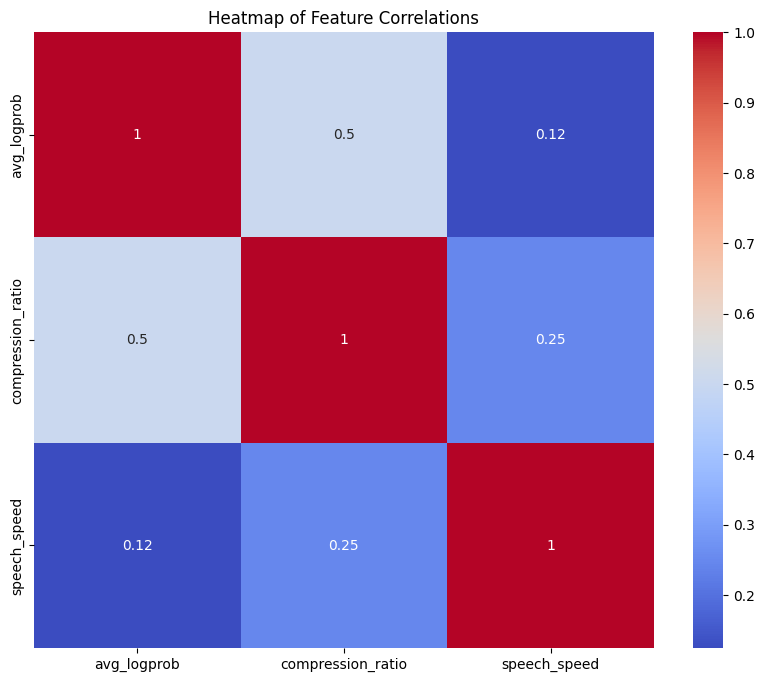

In [285]:

# Heatmap of Feature Correlations
correlation_data = combined_df_reset[[ 'avg_logprob', 'compression_ratio', 'speech_speed']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Feature Correlations')
plt.show()




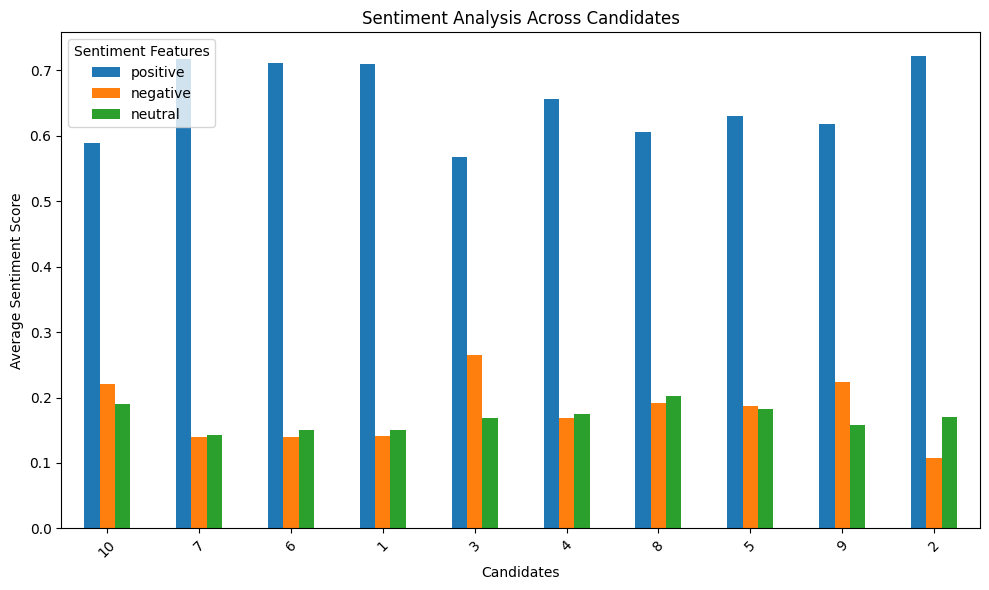

In [ ]:

# Plot Sentiment Features (Bar Chart)
sentiment_df.plot(kind='bar', figsize=(10, 6))
plt.title("Sentiment Analysis Across Candidates")
plt.ylabel("Average Sentiment Score")
plt.xlabel("Candidates")
plt.legend(title="Sentiment Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




graph shows that almost every candidate shows positive sentiment all over the video.candidate has highest positive sentiment score while 3 has lowest positive sentiment score.

In [ ]:
combined_df['speech_speed_normalized'] = 1 / (1 + np.exp(-combined_df['speech_speed']))

combined_df_scaled = combined_df.drop(columns=['speech_speed'])

In [ ]:
combined_df_scaled.head()

id  seek  start    end  \
candidate index                           
10        0       0     0   0.00   6.04   
          1       1     0   6.04  12.08   
          2       2     0  12.08  16.68   
          3       3     0  16.68  22.56   
          4       4     0  22.56  26.76   

                                                              text  \
candidate index                                                      
10        0       My name is Michael Ramos, I am from Patna, Bi...   
          1       I went up to do my graduation in B.Com Honour...   
          2       as well as a Tax Associate wherein I got the ...   
          3       learned in my B.Com to apply them in real lif...   
          4       been involved in a lot of extracurricular act...   

                                                            tokens  \
candidate index                                                      
10        0      [50364, 1222, 1315, 307, 49328, 2786, 11, 286,...   
          1      [50666, 286, 1437, 493, 281, 360, 452, 15652, ...   
          2      [50968, 382, 731, 382, 257, 23263, 28520, 4353...   
          3      [51198, 3264, 294, 452, 363, 13, 14627, 281, 3...   
          4      [51492, 668, 3288, 294, 257, 688, 295, 1279, 1...   

                 temperature  avg_logprob  compression_ratio  no_speech_prob  \
candidate index                                                                
10        0              0.0    -0.331398           1.622711        0.543254   
          1              0.0    -0.331398           1.622711        0.543254   
          2              0.0    -0.331398           1.622711        0.543254   
          3              0.0    -0.331398           1.622711        0.543254   
          4              0.0    -0.331398           1.622711        0.543254   

                 positive  negative   neutral  confident  hesitant   concise  \
candidate index                                                                
10        0      0.457349  0.206400  0.336251   0.888680  0.881647  0.705780   
          1      0.532671  0.222764  0.244564   0.732424  0.750270  0.620743   
          2      0.714758  0.117540  0.167701   0.764776  0.384795  0.388321   
          3      0.606619  0.132189  0.261192   0.829503  0.472637  0.776919   
          4      0.629161  0.139293  0.231547   0.732535  0.387367  0.098993   

                 enthusiastic  speech_speed_normalized  
candidate index                                         
10        0          0.623946                 0.951668  
          1          0.367078                 0.943458  
          2          0.316069                 0.984178  
          3          0.383717                 0.938260  
          4          0.349005                 0.972653

overall all candidate have posituve sentiment in heich 7 th candidate has highest positive senitment.

In [ ]:
import numpy as np

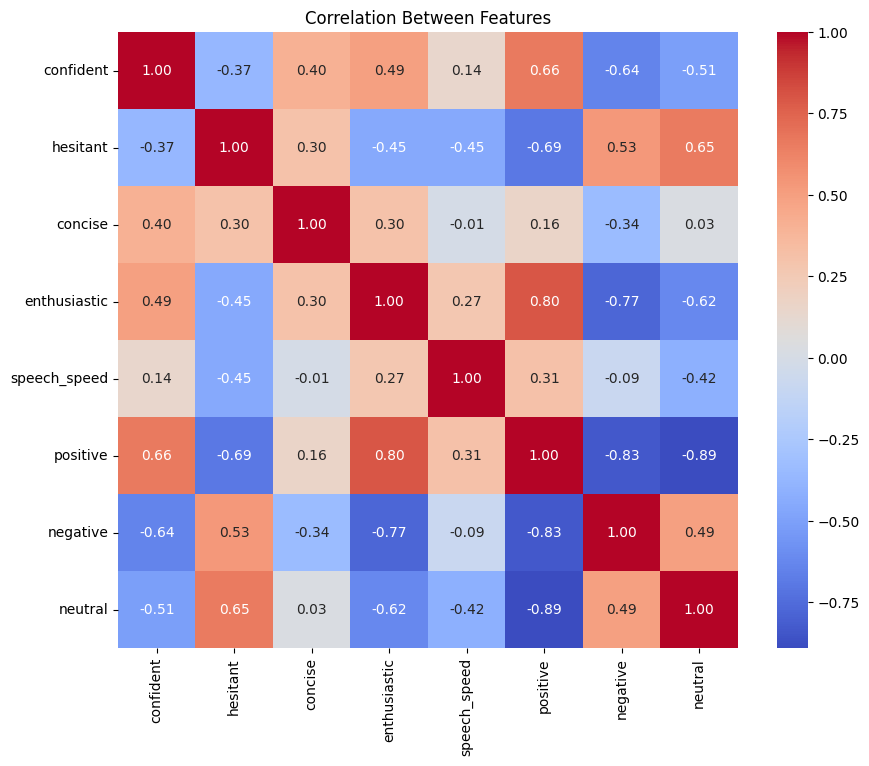

In [ ]:
correlation_matrix = df[['confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed', 'positive', 'negative', 'neutral']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Features')
plt.show()


This heatmap displays the correlation between various features extracted from candidates' transcripts. The strong positive correlation between **positive** sentiment and **enthusiastic** behavior (0.80) suggests that candidates who express enthusiasm are often perceived positively. Conversely, there is a strong negative correlation between **positive** and **negative** sentiments (-0.83), as well as **positive** and **neutral** sentiments (-0.89), indicating that candidates showing strong positive emotions tend to express fewer neutral or negative sentiments. Additionally, the **confident** feature correlates highly with **positive** sentiment (0.66), showing that confident candidates are often perceived more positively. These insights can help in understanding which emotional and behavioral traits lead to more favorable candidate evaluations.

In [305]:
# Prepare the data for plotting
candidates = transcript_emo.index  # Candidate names
confident = transcript_emo['confident']
hesitant = transcript_emo['hesitant']
concise = transcript_emo['concise']
enthusiastic = transcript_emo['enthusiastic']





In [304]:
transcript_emo.head()

candidate_id  confident  hesitant   concise  enthusiastic
0           10   0.619852  0.520637  0.385655      0.325507
1            7   0.703714  0.457070  0.398571      0.463940
2            6   0.679755  0.490252  0.367792      0.481433
3            1   0.733828  0.485172  0.429418      0.466497
4            3   0.573566  0.604004  0.394715      0.448050

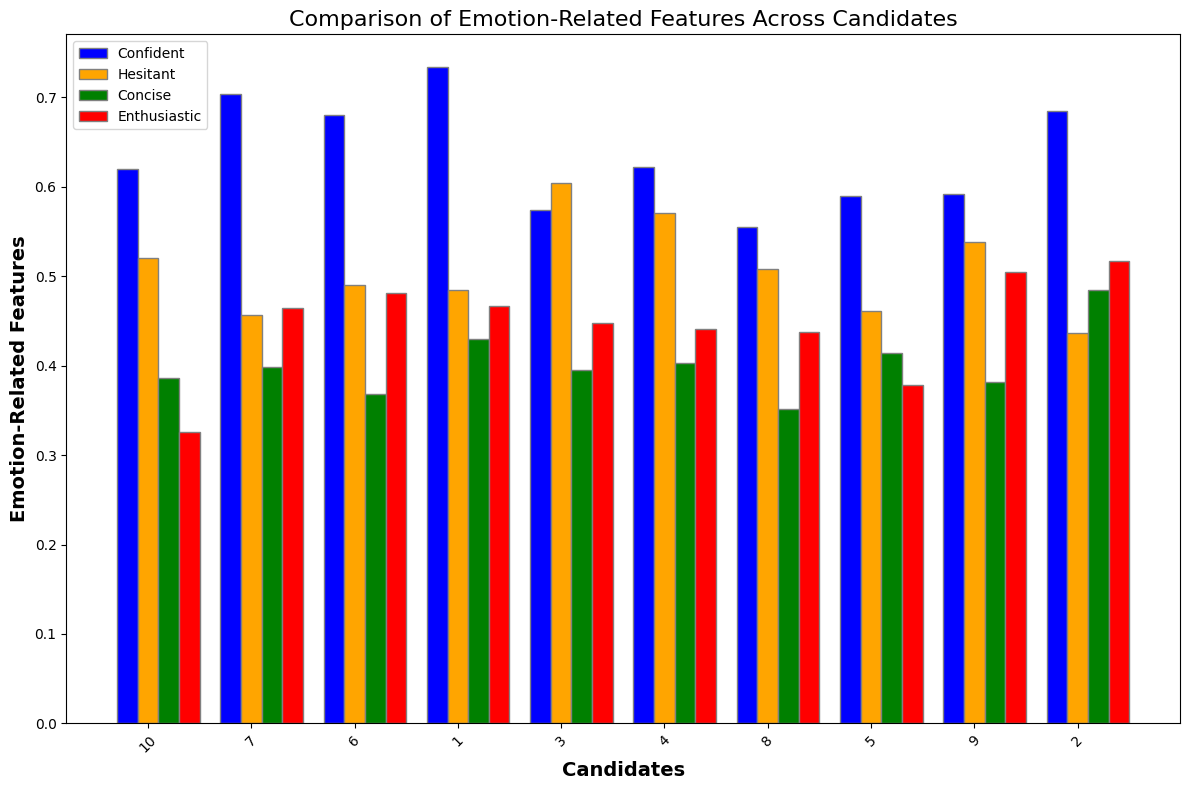

In [319]:
# Prepare the data for plotting
candidates = transcript_emo['candidate_id'] # Candidate names
confident = transcript_emo['confident']
hesitant = transcript_emo['hesitant']
concise = transcript_emo['concise']
enthusiastic = transcript_emo['enthusiastic']

# Bar width and positions
bar_width = 0.2
r1 = np.arange(len(candidates))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create grouped bar plot
plt.figure(figsize=(12, 8))
plt.bar(r1, confident, color='blue', width=bar_width, edgecolor='grey', label='Confident')
plt.bar(r2, hesitant, color='orange', width=bar_width, edgecolor='grey', label='Hesitant')
plt.bar(r3, concise, color='green', width=bar_width, edgecolor='grey', label='Concise')
plt.bar(r4, enthusiastic, color='red', width=bar_width, edgecolor='grey', label='Enthusiastic')

# Labels and Titles
plt.xlabel('Candidates', fontweight='bold', fontsize=14)
plt.ylabel('Emotion-Related Features', fontweight='bold', fontsize=14)
plt.title('Comparison of Emotion-Related Features Across Candidates', fontsize=16)
plt.xticks([r + bar_width for r in range(len(candidates))], candidates, rotation=45)
plt.legend()

# Display plot
plt.tight_layout()
plt.show()


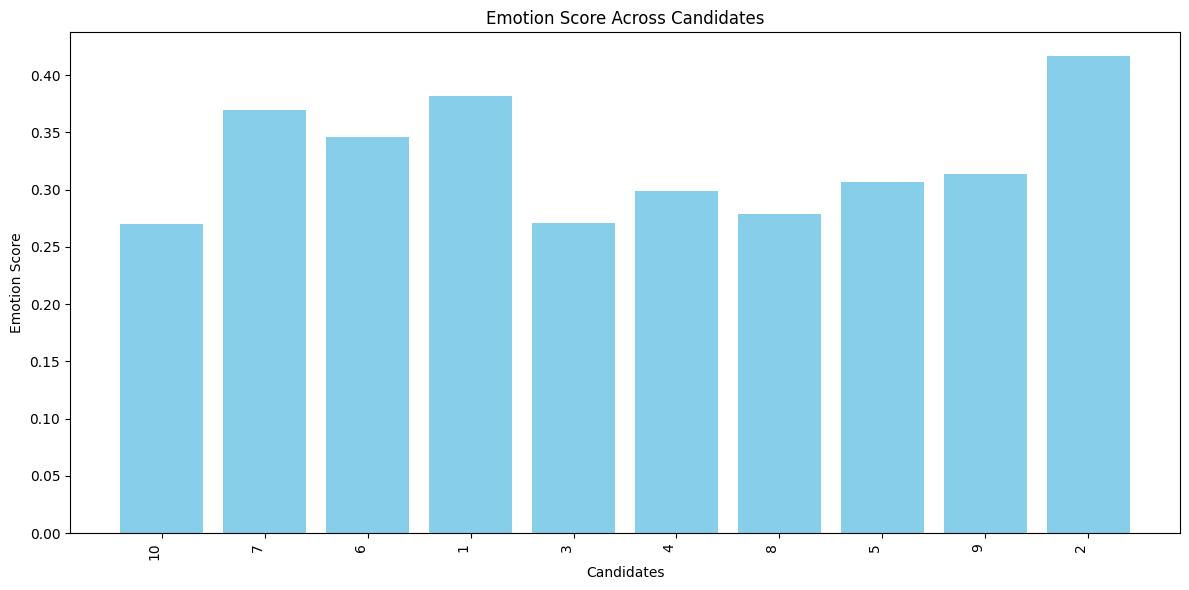

In [306]:
import matplotlib.pyplot as plt

# Ensure 'emotion_scor' has been calculated correctly
emotion_scor = (confident - hesitant + concise + enthusiastic) / 3  # This normalizes as in the original idea

# Use candidate names from transcript_emo
candidates = transcript_emo['candidate_id']  # Ensure this matches the size of emotion_scor

# Plot Emotion Score vs Candidates (Bar Chart)
plt.figure(figsize=(12, 6))  # Increased figure size
plt.bar(candidates, emotion_scor, color='skyblue')
plt.title("Emotion Score Across Candidates")
plt.ylabel("Emotion Score")
plt.xlabel("Candidates")

# Rotate x-axis labels and set their alignment
plt.xticks(rotation=90, ha='right')  # Rotate more for better readability

plt.tight_layout()  # Ensure everything fits within the figure
plt.show()


emotion score calculated as positive emotion-negative emotons score

---


2,1,7 has high score for positive emotions

emotion score= confident-hesident+ consice +enthusiast/3

In [314]:
# Assuming combined_df_scaled has 'candidate' as the first index level
dominant_candidates = {}

# Loop through each feature and find the candidate with the highest average value
All_features = ['confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed_normalized', 'positive', 'negative', 'neutral']
for feature in All_features:
    max_value = -1e9
    dominant_candidate = None

    # Group the data by the 'candidate' index and calculate the mean for each feature
    for candidate, df in combined_df_scaled.groupby(level=0):
        # Calculate the average value for the feature for this candidate
        avg_value = df[feature].mean()  # Ensure 'df' refers to the candidate's data

        # Find the maximum value and corresponding candidate
        if avg_value > max_value:
            max_value = avg_value
            dominant_candidate = candidate

    dominant_candidates[feature] = (dominant_candidate, max_value)

# Display the dominant candidate for each feature
for feature, (candidate, value) in dominant_candidates.items():
    print(f"The dominant candidate for {feature} is {candidate} with an average {feature} score of {value:.2f}.")



The dominant candidate for confident is 1 with an average confident score of 0.73.
The dominant candidate for hesitant is 3 with an average hesitant score of 0.60.
The dominant candidate for concise is 2 with an average concise score of 0.48.
The dominant candidate for enthusiastic is 2 with an average enthusiastic score of 0.52.
The dominant candidate for speech_speed_normalized is 2 with an average speech_speed_normalized score of 0.96.
The dominant candidate for positive is 2 with an average positive score of 0.72.
The dominant candidate for negative is 3 with an average negative score of 0.26.
The dominant candidate for neutral is 8 with an average neutral score of 0.20.


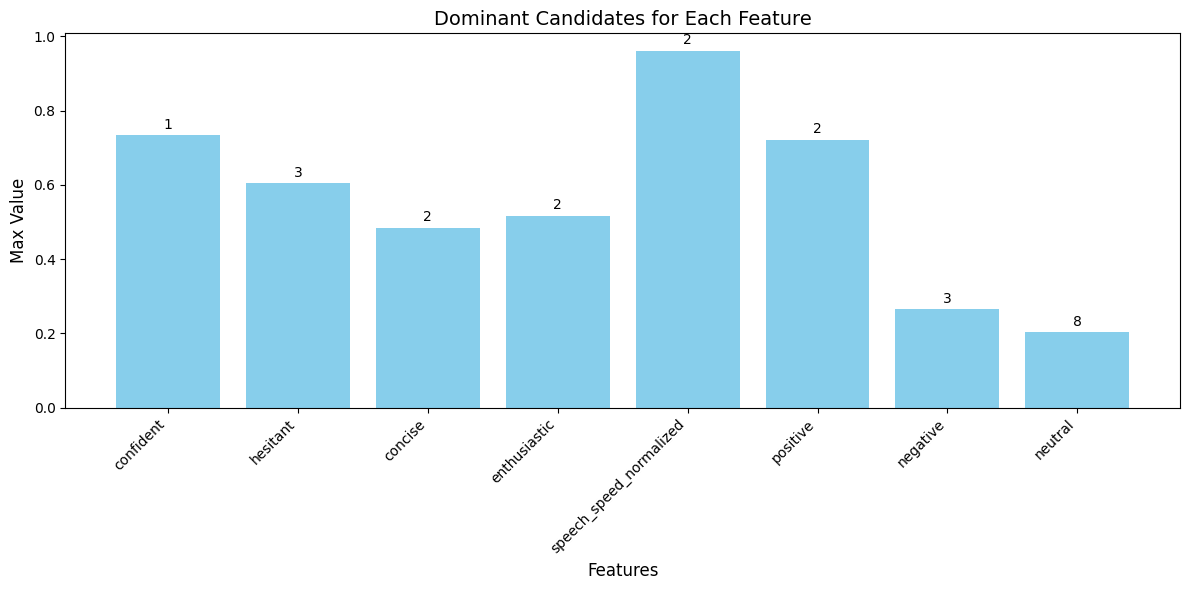

In [315]:
import matplotlib.pyplot as plt

# Assuming 'dominant_candidates' is already populated from your previous code
# Separate the features and the corresponding dominant candidates and their values
features = []
candidates = []
max_values = []

for feature, (candidate, max_value) in dominant_candidates.items():
    features.append(feature)
    candidates.append(candidate)
    max_values.append(max_value)

# Convert to DataFrame for easy visualization
dominant_df = pd.DataFrame({
    'Feature': features,
    'Candidate': candidates,
    'Max Value': max_values
})

# Plotting the results
plt.figure(figsize=(12, 6))

# Create a bar chart for dominant candidates and their max values
plt.bar(features, max_values, color='skyblue')

# Add labels to the bars (candidates' names)
for i, value in enumerate(max_values):
    plt.text(i, value + 0.01, candidates[i], ha='center', va='bottom', fontsize=10, color='black')

# Title and labels
plt.title('Dominant Candidates for Each Feature', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Max Value', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [308]:
import os
import pandas as pd

# List of emotion features to apply the transformation on
emotion_features = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise']

# Function to apply the transformation
def transform_emotions(row):
    neutral_value = row['neutral']
    for feature in emotion_features:
        if neutral_value != 100:
            row[f'{feature}_transformed'] = 100 * row[feature] / (100 - neutral_value)
        else:
            row[f'{feature}_transformed'] = row[feature]  # Keep the value the same if neutral is 100
    return row

# Initialize an empty list to collect all candidate data
all_candidates_data = []

# Iterate over each candidate's data and apply the transformations
for i in range(0, 10):
    dir = f'{i+1}'
    file_path = os.path.join(folder_path, 'emotion_data-20240903T095158Z-001', 'emotion_data', dir, 'emotion.csv')

    # Load the candidate's emotion data
    candidate_emotion_data = pd.read_csv(file_path)

    # Apply the transformation function to each row
    candidate_emotion_data = candidate_emotion_data.apply(transform_emotions, axis=1)

    # List of transformed emotion features
    transformed_features = [f'{feature}_transformed' for feature in emotion_features]

    # Drop original emotion columns (keep only the transformed ones and relevant IDs)
    candidate_emotion_transformed= candidate_emotion_data[['movie_id', 'image_seq'] + transformed_features]

    # Create a new column for the dominant transformed emotion
    candidate_emotion_transformed['dominant_emotion_transformed'] = candidate_emotion_transformed[transformed_features].idxmax(axis=1)

    # Map the transformed feature names back to emotion names
    candidate_emotion_transformed['dominant_emotion_transformed'] = candidate_emotion_transformed['dominant_emotion_transformed'].str.replace('_transformed', '')

    # Add a column for candidate ID
    candidate_emotion_transformed['candidate_id'] = i + 1

    # Append the transformed data for this candidate to the list
    all_candidates_data.append(candidate_emotion_transformed)

# Concatenate all the candidate data into a single DataFrame
combined_data = pd.concat(all_candidates_data, ignore_index=True)



<ipython-input-308-b0ed8a862124>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidate_emotion_transformed['dominant_emotion_transformed'] = candidate_emotion_transformed[transformed_features].idxmax(axis=1)
<ipython-input-308-b0ed8a862124>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidate_emotion_transformed['dominant_emotion_transformed'] = candidate_emotion_transformed['dominant_emotion_transformed'].str.replace('_transformed', '')
<ipython-input-308-b0ed8a862124>:44: SettingWithCopyWarni

In [309]:
# Drop rows where 'movie_id' or 'image_seq' have NaN values
combined_data_emo= combined_data.dropna(subset=['movie_id', 'image_seq'])


In [310]:
emotion_features=[ 'angry_transformed', 'disgust_transformed',
       'fear_transformed', 'happy_transformed', 'sad_transformed',
       'surprise_transformed']

In [311]:
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize a dictionary to store dominant emotions and their dominance percentages for each candidate
dominant_emotions = {}
mean_scores_data = []

# Group the combined data by 'candidate_id' to process each candidate separately
grouped_data = combined_data.groupby('candidate_id')

# Iterate through each candidate's grouped data
for candidate_id, df in grouped_data:
    # Calculate the value counts of the dominant emotion
    emotion_counts = df['dominant_emotion_transformed'].value_counts()

    # Find the dominant emotion (most frequent one)
    dominant_emotion = emotion_counts.idxmax()

    # Calculate the percentage dominance of the dominant emotion
    dominance_percentage = (emotion_counts.max() / emotion_counts.sum()) * 100

    # Store both the dominant emotion and its percentage for the candidate
    dominant_emotions[candidate_id] = (dominant_emotion, dominance_percentage)

    # Calculate the mean score for each feature for the current candidate
    feature_means = df[emotion_features].mean()

    # Create a dictionary to store the mean scores, dominant emotion, and dominance percentage
    candidate_data = {'candidate_id': candidate_id}
    candidate_data.update(feature_means.to_dict())  # Add the mean scores for each feature
    candidate_data['dominant_emotion'] = dominant_emotion
    candidate_data['dominance_percentage'] = dominance_percentage

    # Append the data to the list
    mean_scores_data.append(candidate_data)

# Convert the mean_scores_data list to a DataFrame for easy analysis
mean_scores_df = pd.DataFrame(mean_scores_data)





In [312]:
emotion_new_data=mean_scores_df.copy()

In [ ]:
combined_data.columns

Index(['movie_id', 'image_seq', 'angry_transformed', 'disgust_transformed',
       'fear_transformed', 'happy_transformed', 'sad_transformed',
       'surprise_transformed', 'dominant_emotion_transformed', 'candidate_id'],
      dtype='object')

In [313]:
emotion_new_data

candidate_id  angry_transformed  disgust_transformed  fear_transformed  \
0             1          24.079128             0.722852         26.162708   
1             2          13.662825             0.395368          9.663597   
2             3           2.290224             0.002118         28.648020   
3             4          34.821450             0.001308         22.528208   
4             5          45.753713             0.000059          0.855867   
5             6           0.061362             0.000004          0.478492   
6             7           7.296359             0.157911         47.072547   
7             8          29.166509             0.014749         37.782029   
8             9          11.509094             0.158882         30.247807   
9            10           4.932649             0.051733         39.710481   

   happy_transformed  sad_transformed  surprise_transformed dominant_emotion  \
0          10.324676        27.817562             10.893111              sad   
1          40.876675        32.413035              2.988676            happy   
2          40.229675        17.317976             11.511491            happy   
3           8.067421        19.600054             14.986195            angry   
4          39.855883        12.846439              0.682297            angry   
5          93.398613         6.041549              0.020179            happy   
6          10.397122        30.794959              4.281096             fear   
7          11.190179        16.522762              5.323702             fear   
8          23.176652        14.265014             20.642551             fear   
9           5.178859        45.406314              4.719878              sad   

   dominance_percentage  
0             31.034483  
1             45.977011  
2             44.000000  
3             38.383838  
4             50.000000  
5            100.000000  
6             47.126437  
7             46.236559  
8             34.883721  
9             50.000000

In [ ]:



df1 = pd.concat(data_emo.values(), keys=data_emo.keys(), names=['candidate', 'index'])
df2 = pd.concat(data_gaze.values(), keys=data_gaze.keys(), names=['candidate', 'index'])
df3 = pd.concat(data_meta.values(), keys=data_meta.keys(), names=['candidate', 'index'])


In [ ]:
df1.head()

movie_id  image_seq     angry  \
candidate index                                                              
cand_1    0      93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          0   4.31735   
          1      93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          1  53.22530   
          2      93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          2   8.79651   
          3      93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          3   9.45303   
          4      93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          4  56.00020   

                  disgust       fear     happy        sad   surprise  \
candidate index                                                        
cand_1    0      0.000594   2.879790   1.65035   2.779980   0.600814   
          1      2.981640  12.736800   1.52347   1.051320  27.216800   
          2      0.029468   2.968160  16.83150  39.884600   0.279335   
          3      0.106778   1.553080  20.93010   3.503870   0.909426   
          4      0.000004   0.162231   5.58358   0.197026  12.807600   

                  neutral dominant_emotion  
candidate index                             
cand_1    0      87.77110          neutral  
          1       1.26462            angry  
          2      31.21050              sad  
          3      63.54370          neutral  
          4      25.24940            angry

normal distributed speech speed5

In [320]:
# Filter only numeric columns
df1_numeric = df1.select_dtypes(include=['number'])

# Check the resulting DataFrame
print(df1_numeric.head())


                 image_seq     angry   disgust       fear     happy  \
candidate index                                                       
cand_1    0              0   4.31735  0.000594   2.879790   1.65035   
          1              1  53.22530  2.981640  12.736800   1.52347   
          2              2   8.79651  0.029468   2.968160  16.83150   
          3              3   9.45303  0.106778   1.553080  20.93010   
          4              4  56.00020  0.000004   0.162231   5.58358   

                       sad   surprise   neutral  
candidate index                                  
cand_1    0       2.779980   0.600814  87.77110  
          1       1.051320  27.216800   1.26462  
          2      39.884600   0.279335  31.21050  
          3       3.503870   0.909426  63.54370  
          4       0.197026  12.807600  25.24940  


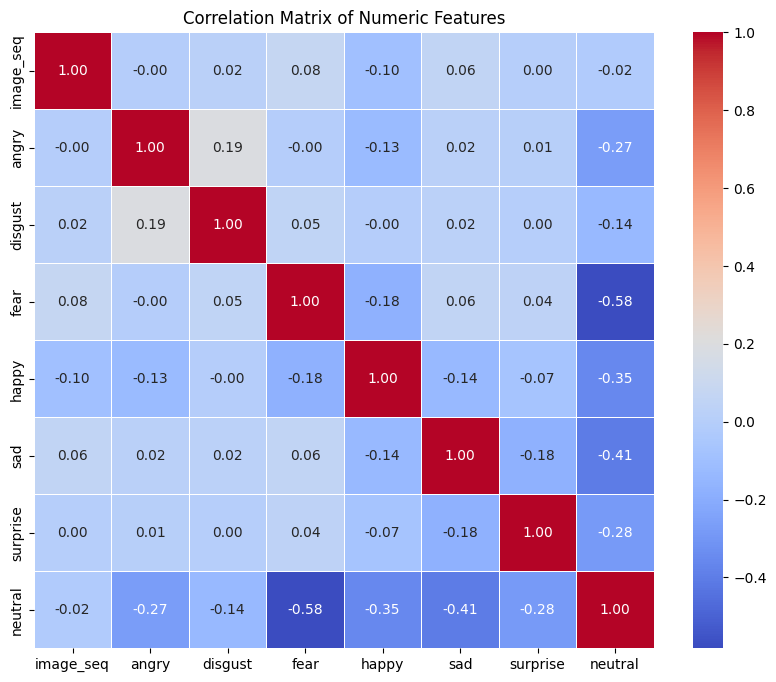

In [321]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df1_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


  Candidate Dominant Emotion  Percentage Dominance
0    cand_1          neutral             42.528736
1    cand_2            happy             35.632184
2    cand_3          neutral             43.000000
3    cand_4          neutral             98.989899
4    cand_5          neutral            100.000000
5    cand_6          neutral            100.000000
6    cand_7             fear             43.678161
7    cand_8          neutral             78.494624
8    cand_9          neutral             43.023256
9   cand_10              sad             38.888889


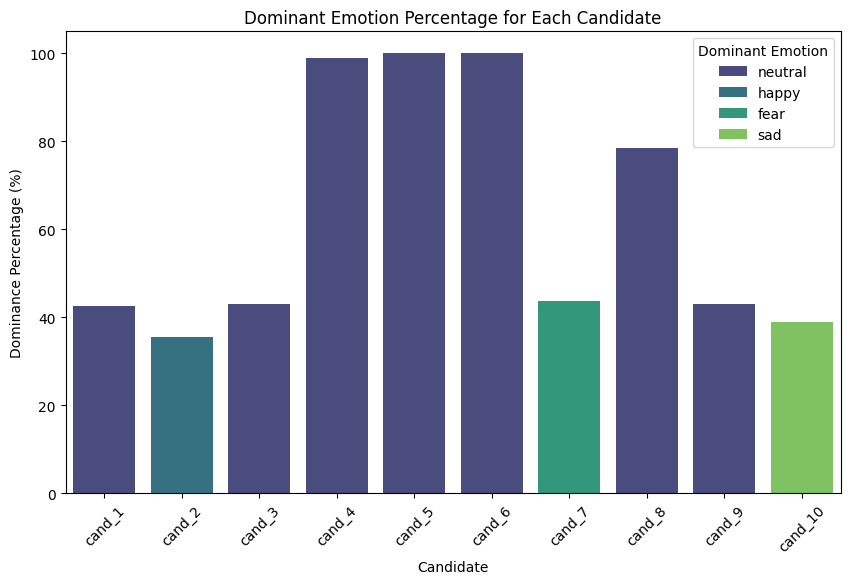

In [ ]:
dominant_emotions = {}

# Iterate through each candidate's emotion data
for candidate, df in data_emo.items():
    emotion_counts = df['dominant_emotion'].value_counts()

    # Find the dominant emotion (most frequent one)
    dominant_emotion = emotion_counts.idxmax()

    # Calculate the percentage dominance of the dominant emotion
    dominance_percentage = (emotion_counts.max() / emotion_counts.sum()) * 100

    # Store both the dominant emotion and its percentage
    dominant_emotions[candidate] = (dominant_emotion, dominance_percentage)

# Convert the dominant_emotions dict to a DataFrame for easy analysis
dominant_emotions_df = pd.DataFrame(list(dominant_emotions.items()), columns=['Candidate', 'Dominant Emotion and Percentage'])
dominant_emotions_df[['Dominant Emotion', 'Percentage Dominance']] = pd.DataFrame(dominant_emotions_df['Dominant Emotion and Percentage'].tolist(), index=dominant_emotions_df.index)
dominant_emotions_df.drop(columns='Dominant Emotion and Percentage', inplace=True)

# Display the DataFrame with candidates, dominant emotions, and dominance percentage
print(dominant_emotions_df)

# EDA: Plot the dominant emotion percentage for each candidate
plt.figure(figsize=(10, 6))
sns.barplot(data=dominant_emotions_df, x='Candidate', y='Percentage Dominance', hue='Dominant Emotion', palette='viridis')
plt.title('Dominant Emotion Percentage for Each Candidate')
plt.ylabel('Dominance Percentage (%)')
plt.xlabel('Candidate')
plt.xticks(rotation=45)
plt.show()


This graph is showing most of the candidate are neutral while giving thier intro but it do not show specific emotion analysis, candidate (4,5,6,8) most neutral in their introduction

   Candidate Dominant Emotion  Percentage Dominance
0          1              sad             31.034483
1          2            happy             45.977011
2          3            happy             44.000000
3          4            angry             38.383838
4          5            angry             50.000000
5          6            happy            100.000000
6          7             fear             47.126437
7          8             fear             46.236559
8          9             fear             34.883721
9         10              sad             50.000000


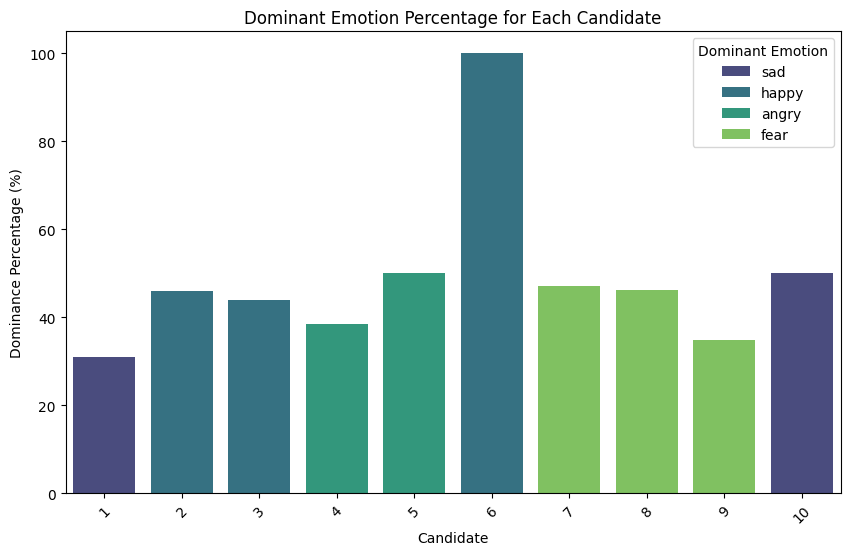

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize a dictionary to store dominant emotions and their dominance percentages for each candidate
dominant_emotions = {}

# Group the combined data by 'candidate_id' to process each candidate separately
grouped_data = combined_data.groupby('candidate_id')

# Iterate through each candidate's grouped data
for candidate_id, df in grouped_data:
    emotion_counts = df['dominant_emotion_transformed'].value_counts()

    # Find the dominant emotion (most frequent one)
    dominant_emotion = emotion_counts.idxmax()

    # Calculate the percentage dominance of the dominant emotion
    dominance_percentage = (emotion_counts.max() / emotion_counts.sum()) * 100

    # Store both the dominant emotion and its percentage for the candidate
    dominant_emotions[candidate_id] = (dominant_emotion, dominance_percentage)

# Convert the dominant_emotions dictionary to a DataFrame for easy analysis
dominant_emotions_df = pd.DataFrame(list(dominant_emotions.items()), columns=['Candidate', 'Dominant Emotion and Percentage'])

# Split the tuple of 'Dominant Emotion and Percentage' into separate columns
dominant_emotions_df[['Dominant Emotion', 'Percentage Dominance']] = pd.DataFrame(dominant_emotions_df['Dominant Emotion and Percentage'].tolist(), index=dominant_emotions_df.index)

# Drop the original 'Dominant Emotion and Percentage' column as it's now split into two
dominant_emotions_df.drop(columns='Dominant Emotion and Percentage', inplace=True)

# Display the DataFrame with candidates, dominant emotions, and dominance percentage
print(dominant_emotions_df)

# EDA: Plot the dominant emotion percentage for each candidate
plt.figure(figsize=(10, 6))
sns.barplot(data=dominant_emotions_df, x='Candidate', y='Percentage Dominance', hue='Dominant Emotion', palette='viridis')
plt.title('Dominant Emotion Percentage for Each Candidate')
plt.ylabel('Dominance Percentage (%)')
plt.xlabel('Candidate')
plt.xticks(rotation=45)
plt.show()


this is graph for data when we not consider neutral emotion score in our data and transformed our data such that , we can get specific emotion dominant,
candidate: 6 has highest sad emotions,
happy (most positive emotion) : 2 candidate


--- EDA for cand_1 ---


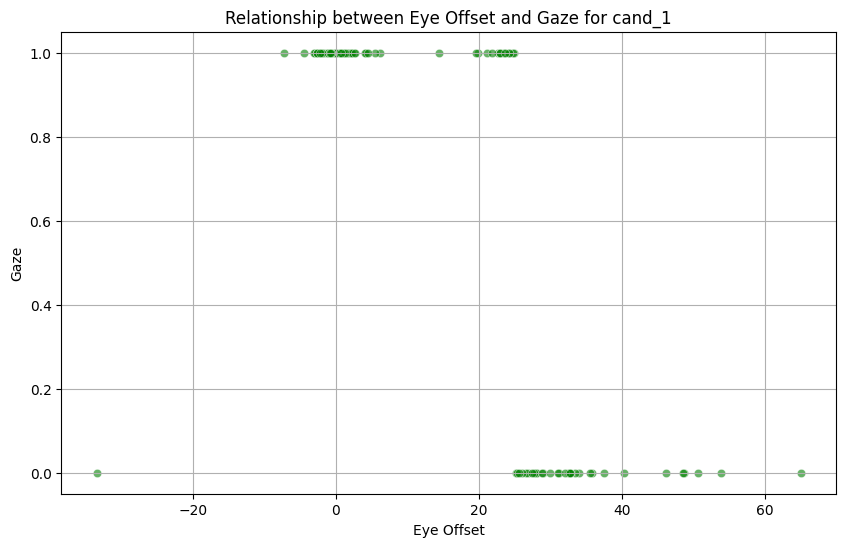

Correlation Matrix for cand_1:
            eye_offset  blink      gaze
eye_offset    1.000000    NaN -0.732313
blink              NaN    NaN       NaN
gaze         -0.732313    NaN  1.000000


--- EDA for cand_2 ---


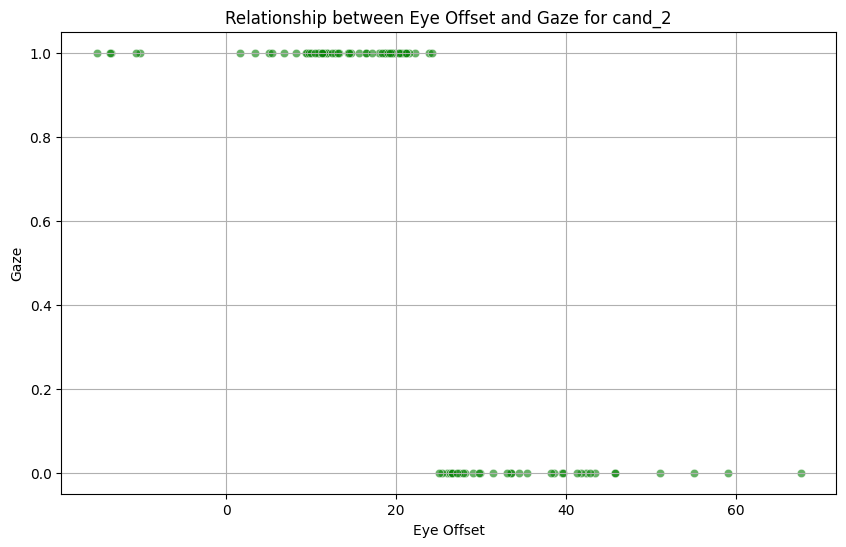

Correlation Matrix for cand_2:
            eye_offset     blink      gaze
eye_offset    1.000000  0.327987 -0.772046
blink         0.327987  1.000000 -0.274088
gaze         -0.772046 -0.274088  1.000000


--- EDA for cand_3 ---


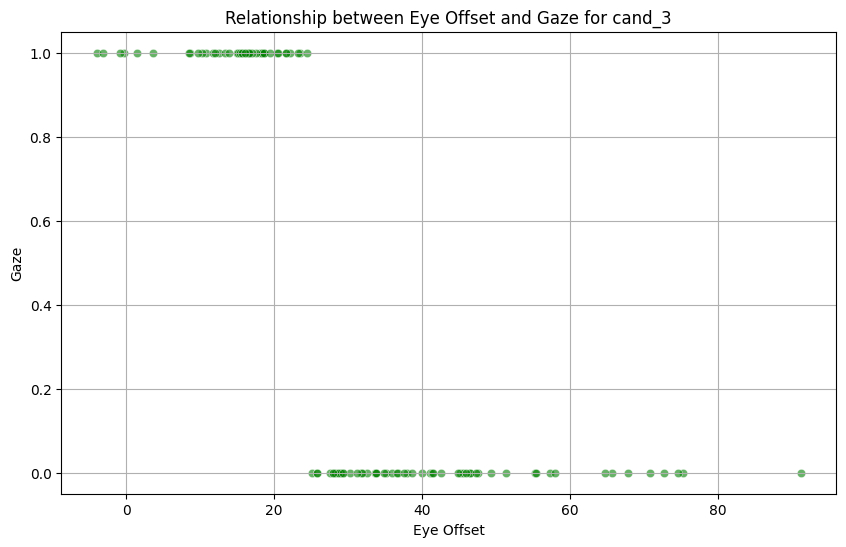

Correlation Matrix for cand_3:
            eye_offset     blink      gaze
eye_offset    1.000000  0.558514 -0.762732
blink         0.558514  1.000000 -0.248160
gaze         -0.762732 -0.248160  1.000000


--- EDA for cand_4 ---


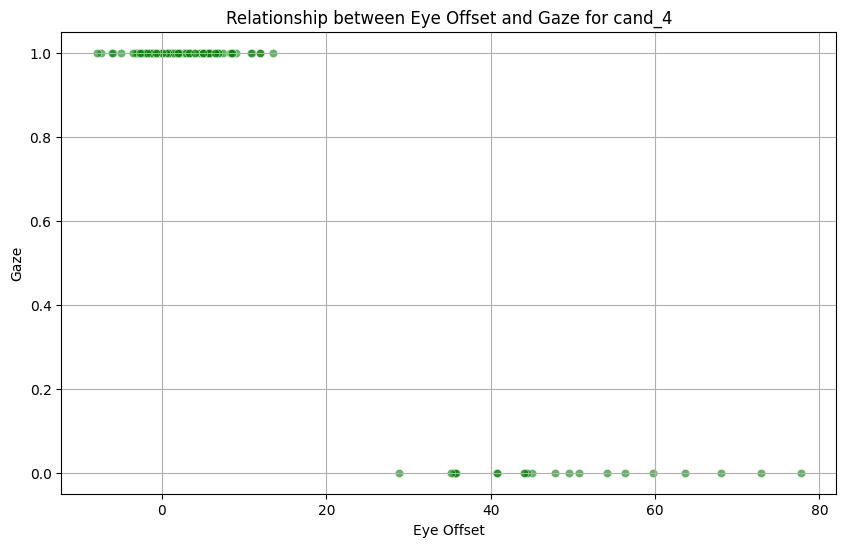

Correlation Matrix for cand_4:
            eye_offset     blink      gaze
eye_offset    1.000000  0.866562 -0.934750
blink         0.866562  1.000000 -0.879121
gaze         -0.934750 -0.879121  1.000000


--- EDA for cand_5 ---


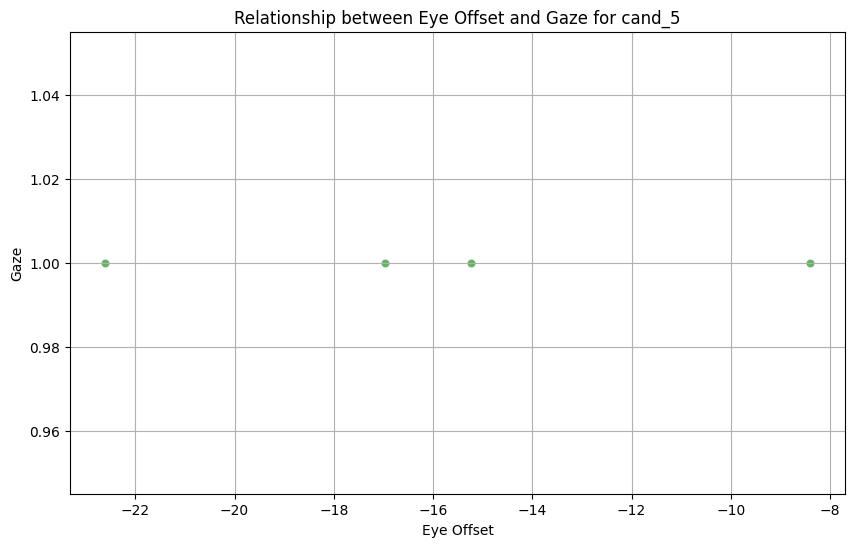

Correlation Matrix for cand_5:
            eye_offset     blink  gaze
eye_offset    1.000000 -0.133605   NaN
blink        -0.133605  1.000000   NaN
gaze               NaN       NaN   NaN


--- EDA for cand_6 ---


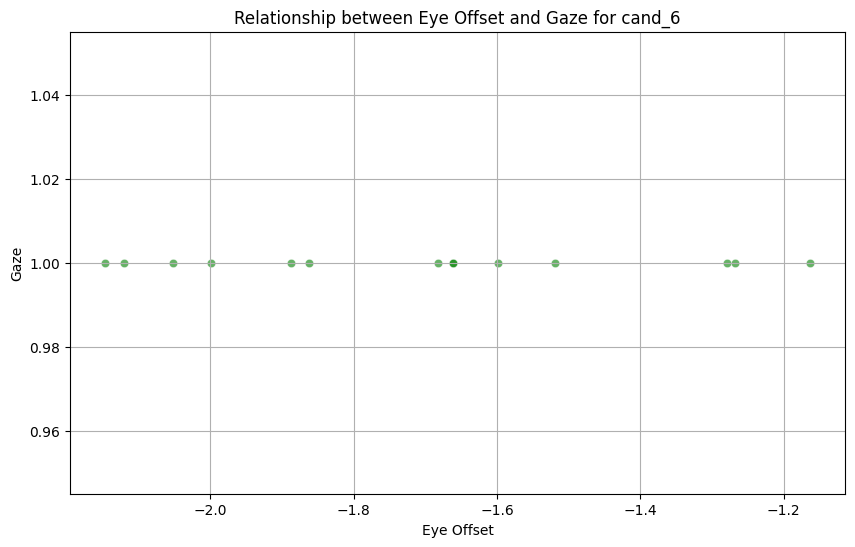

Correlation Matrix for cand_6:
            eye_offset  blink  gaze
eye_offset         1.0    NaN   NaN
blink              NaN    NaN   NaN
gaze               NaN    NaN   NaN


--- EDA for cand_7 ---


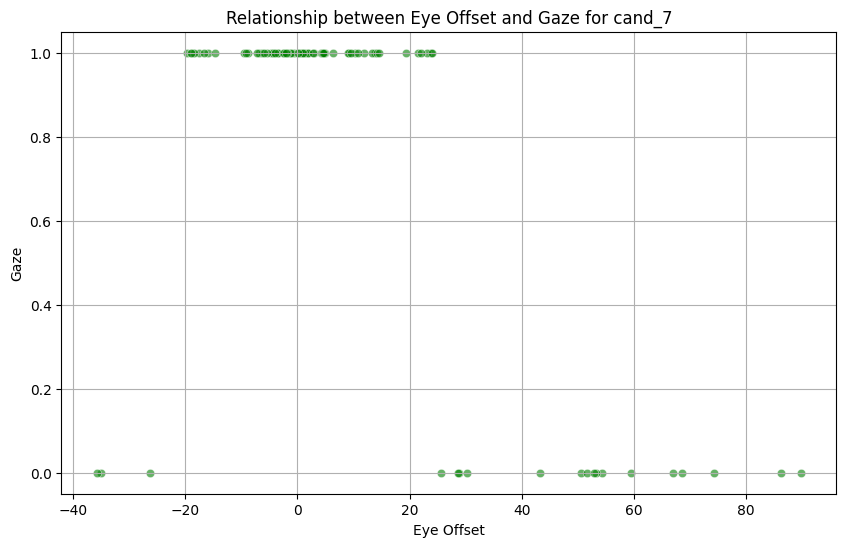

Correlation Matrix for cand_7:
            eye_offset     blink      gaze
eye_offset    1.000000  0.721364 -0.646210
blink         0.721364  1.000000 -0.595975
gaze         -0.646210 -0.595975  1.000000


--- EDA for cand_8 ---


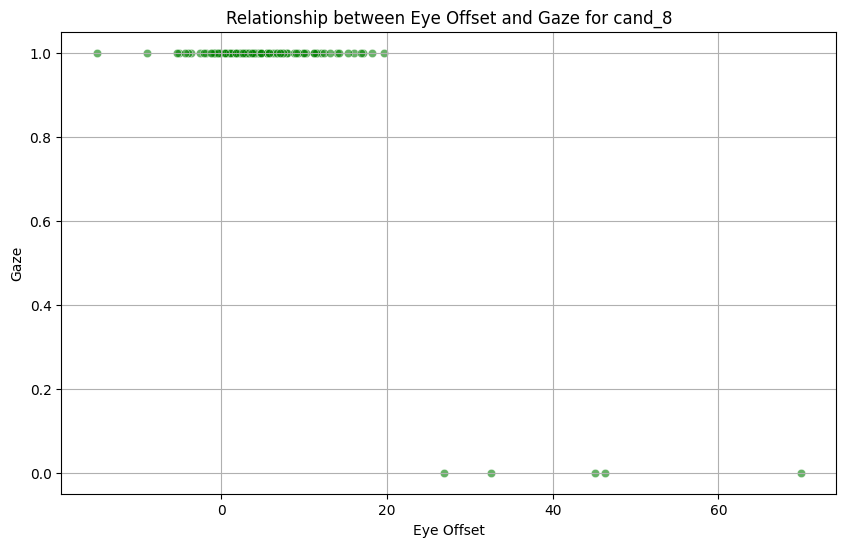

Correlation Matrix for cand_8:
            eye_offset     blink      gaze
eye_offset    1.000000  0.688381 -0.792417
blink         0.688381  1.000000 -0.765942
gaze         -0.792417 -0.765942  1.000000


--- EDA for cand_9 ---


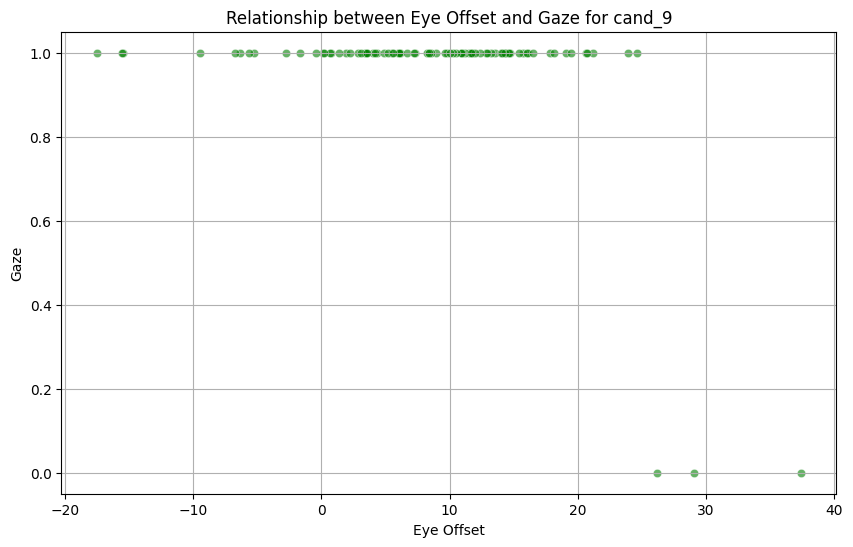

Correlation Matrix for cand_9:
            eye_offset     blink      gaze
eye_offset    1.000000  0.243204 -0.449614
blink         0.243204  1.000000 -0.391143
gaze         -0.449614 -0.391143  1.000000


--- EDA for cand_10 ---


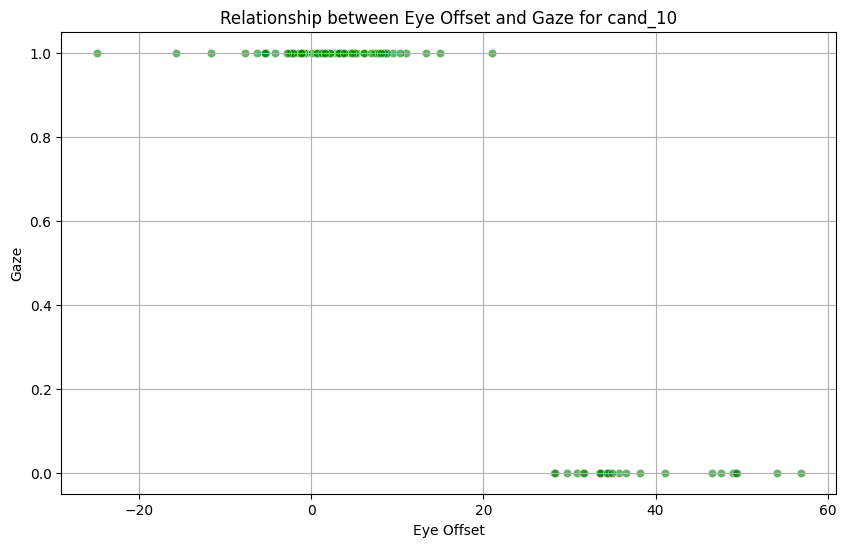

Correlation Matrix for cand_10:
            eye_offset     blink      gaze
eye_offset    1.000000  0.639788 -0.913423
blink         0.639788  1.000000 -0.606780
gaze         -0.913423 -0.606780  1.000000



In [327]:
for candidate, df in data_gaze_old.items():
    print(f"\n--- EDA for {candidate} ---")

    # Scatter plot to visualize relation between eye_offset and gaze
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='eye_offset', y='gaze', alpha=0.6, color='green')
    plt.title(f'Relationship between Eye Offset and Gaze for {candidate}')
    plt.xlabel('Eye Offset')
    plt.ylabel('Gaze')
    plt.grid(True)
    plt.show()

    # Correlation analysis between eye_offset, blink, and gaze
    corr = df[['eye_offset', 'blink', 'gaze']].corr()
    print(f'Correlation Matrix for {candidate}:\n{corr}\n')

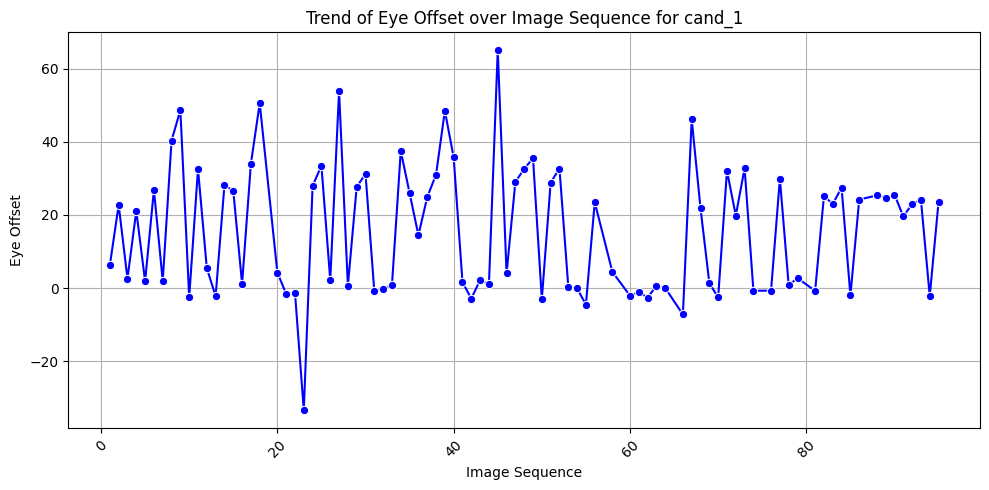

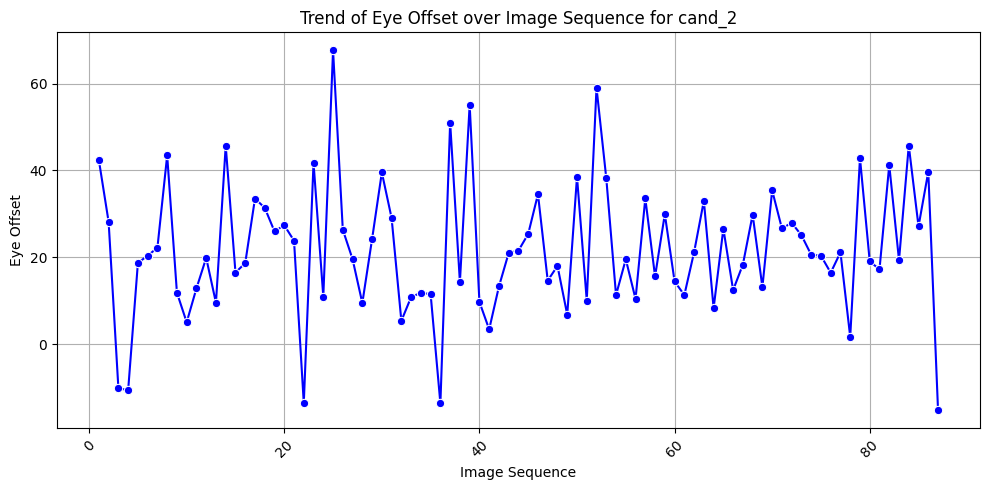

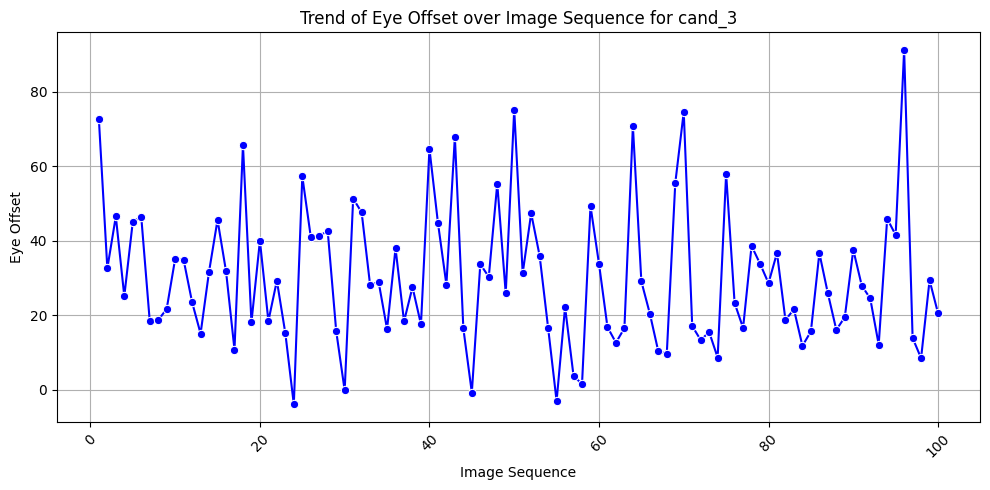

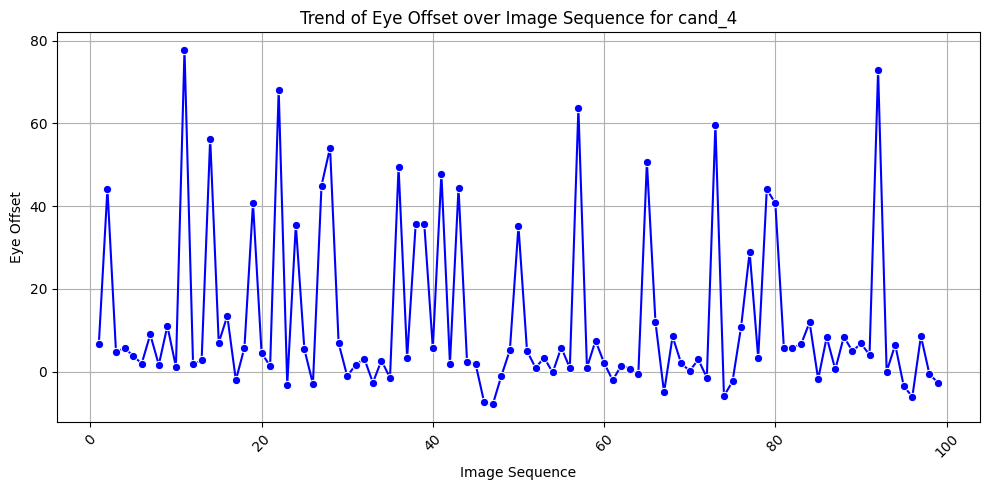

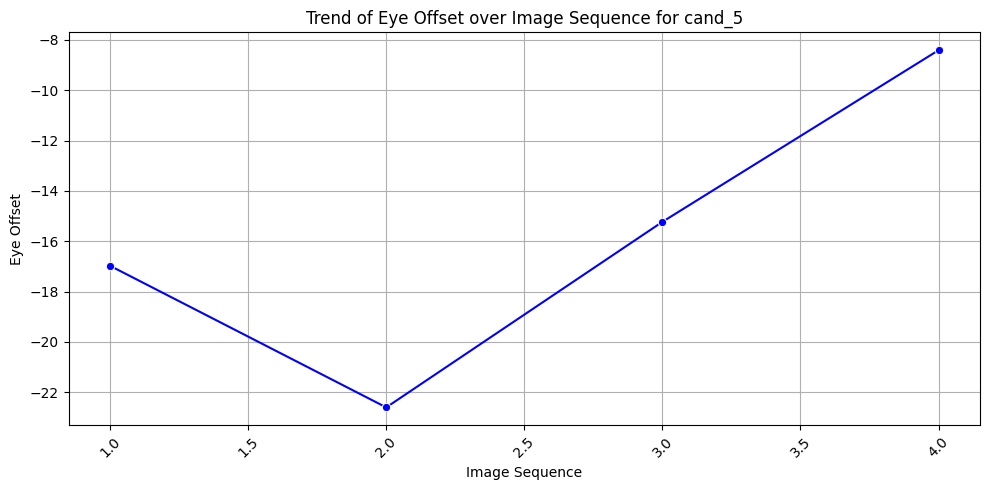

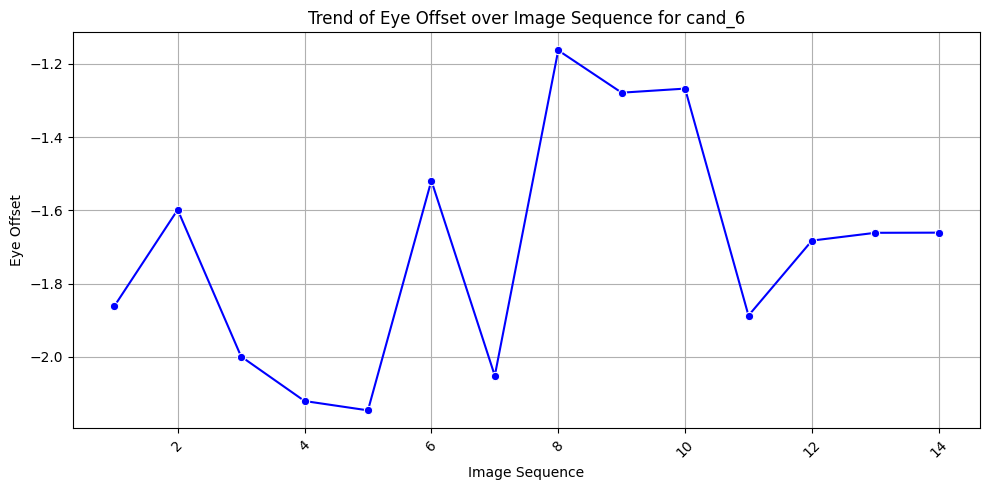

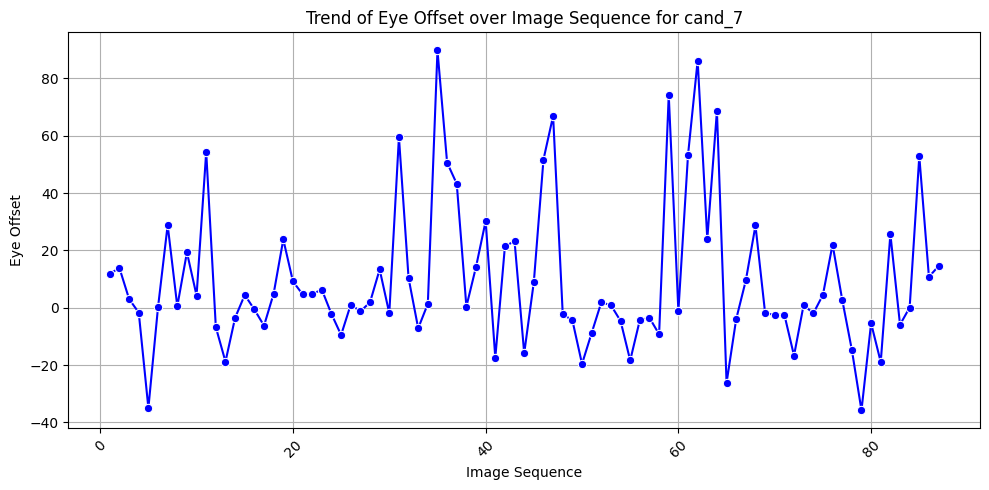

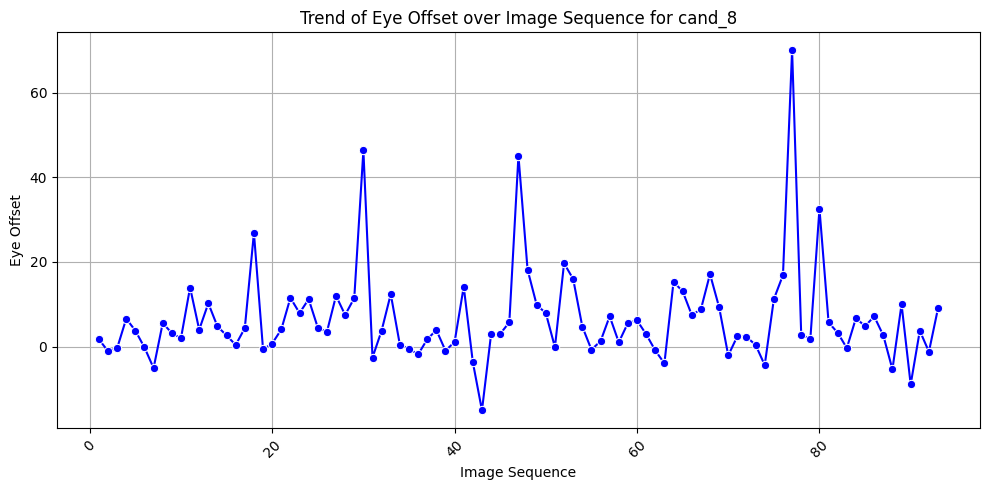

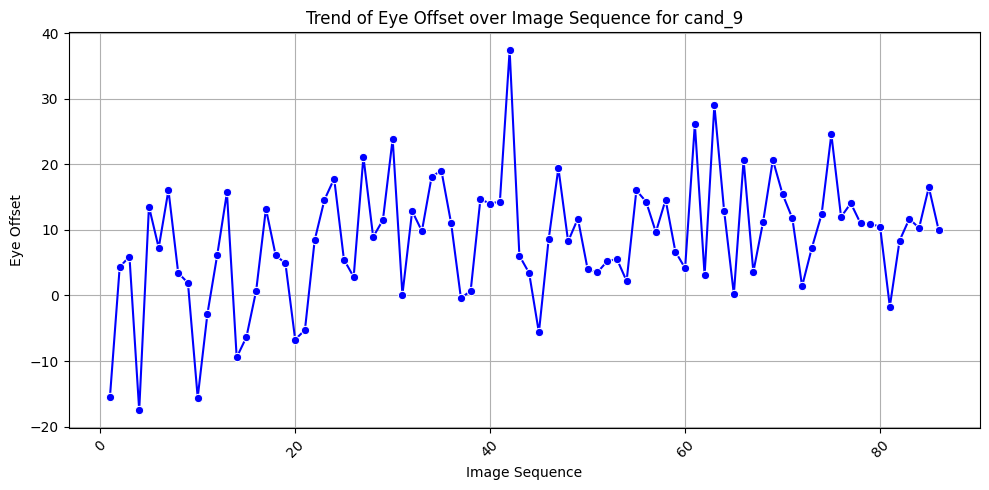

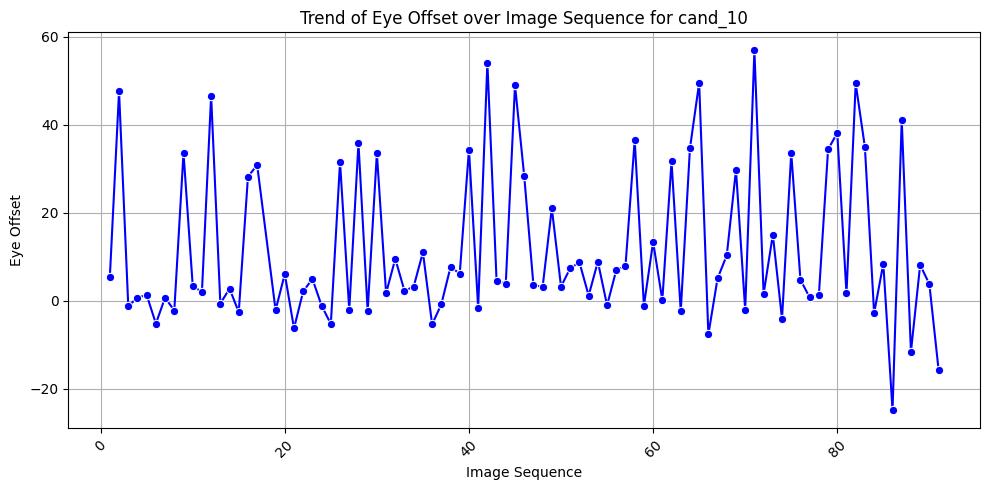

In [329]:
for candidate, df in data_gaze_old.items():
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df, x='image_seq', y='eye_offset', marker='o', color='b')
    plt.title(f'Trend of Eye Offset over Image Sequence for {candidate}')
    plt.xlabel('Image Sequence')
    plt.ylabel('Eye Offset')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

for each candidate eye_offset  trend over image sequences, candidate 5,6 has less data(image sequence)

Statistical Summary:
  Candidate       Mean    Variance   CI Lower   CI Upper
0    cand_1  15.312209  197.906263  12.506767  18.117651
1    cand_2  21.731034  146.054208  19.320970  24.141098
2    cand_3  30.137213  353.989802  26.385178  33.889248
3    cand_4  12.492482  260.964471   9.270951  15.714012
4    cand_5 -16.798537   16.622926 -17.611602 -15.985472
5    cand_6  -1.703596    0.074426  -1.758001  -1.649192
6    cand_7   9.426661  463.987337   5.131053  13.722268
7    cand_8   6.584886   90.385352   4.688963   8.480808
8    cand_9   8.580571   64.519423   6.978739  10.182402
9   cand_10  11.501768  199.351564   8.686100  14.317435


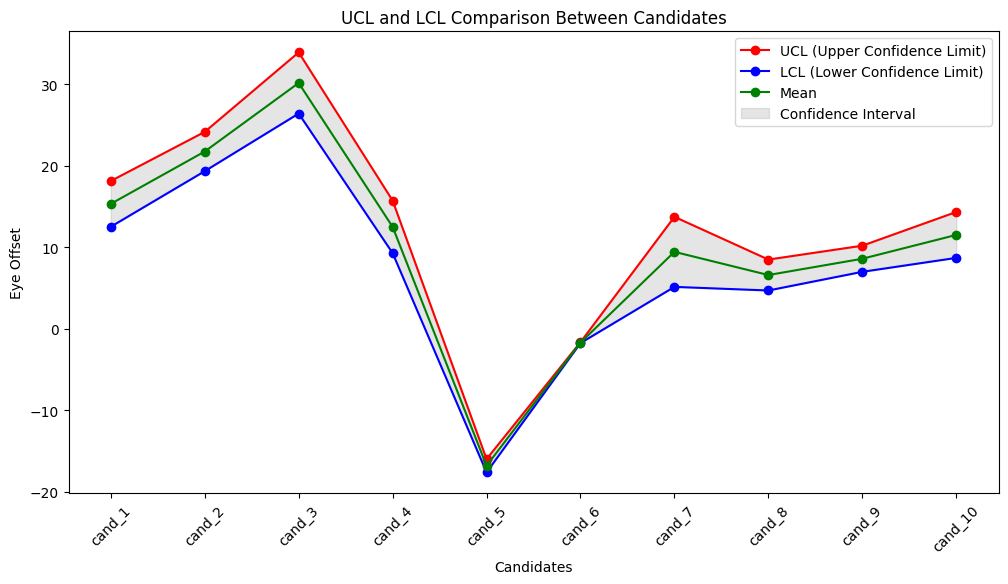

In [332]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Step 1: Normalize and Standardize Data (Resampling and Z-scores)
normalized_data = {}

for candidate_key, df in data_gaze_old.items():
    # Resampling to ensure all candidates have the same number of captures (image sequences)
    image_seq = df['image_seq']
    eye_offset = df['eye_offset']

    # Resample eye_offset to a fixed number of points, say 100 points
    resampled_eye_offset = np.interp(
        np.linspace(image_seq.min(), image_seq.max(), 100),  # target sequence range
        image_seq,  # original image sequence
        eye_offset  # original eye offset
    )

    # Standardize eye_offset values using z-score normalization
    z_scores = stats.zscore(resampled_eye_offset)

    # Store the normalized data for further analysis
    normalized_data[candidate_key] = pd.DataFrame({
        'image_seq': np.linspace(image_seq.min(), image_seq.max(), 100),
        'eye_offset': resampled_eye_offset,
        'z_score': z_scores
    })

# Step 2: Statistical Analysis (Mean, Variance, Confidence Intervals)
stats_summary_list = []

for candidate_key, df in normalized_data.items():
    eye_offset = df['eye_offset']
    mean_val = np.mean(eye_offset)
    variance_val = np.var(eye_offset)

    # 95% Confidence Interval for the mean
    ci_lower, ci_upper = stats.t.interval(0.95, len(eye_offset)-1, loc=mean_val, scale=stats.sem(eye_offset))

    # Append the calculated values to the list
    stats_summary_list.append({
        'Candidate': candidate_key,
        'Mean': mean_val,
        'Variance': variance_val,
        'CI Lower': ci_lower,
        'CI Upper': ci_upper
    })

# Convert the list to a DataFrame
stats_summary = pd.DataFrame(stats_summary_list)

print("Statistical Summary:")
print(stats_summary)



# Step 4: UCL and LCL Comparison Plot

# Extracting candidates, UCL, and LCL from the statistical summary
candidates = stats_summary['Candidate']
ucl_values = stats_summary['CI Upper']
lcl_values = stats_summary['CI Lower']
mean_values = stats_summary['Mean']

# Plot the UCL, LCL, and mean comparison
plt.figure(figsize=(12, 6))
plt.plot(candidates, ucl_values, marker='o', label='UCL (Upper Confidence Limit)', color='r')
plt.plot(candidates, lcl_values, marker='o', label='LCL (Lower Confidence Limit)', color='b')
plt.plot(candidates, mean_values, marker='o', label='Mean', color='g')
plt.fill_between(candidates, lcl_values, ucl_values, color='gray', alpha=0.2, label='Confidence Interval')
plt.title('UCL and LCL Comparison Between Candidates')
plt.xlabel('Candidates')
plt.ylabel('Eye Offset')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Initialize the DataFrame
performance_metrics = pd.DataFrame(columns=['Candidate', 'Mean', 'Std Dev', 'Coefficient of Variation'])

for candidate_key, df in normalized_data.items():
    eye_offset = df['eye_offset']
    mean_val = np.mean(eye_offset)
    std_dev = np.std(eye_offset)
    coef_var = std_dev / mean_val if mean_val != 0 else 0

    # Create a new DataFrame for the current candidate's metrics
    new_data = pd.DataFrame([{
        'Candidate': candidate_key,
        'Mean': mean_val,
        'Std Dev': std_dev,
        'Coefficient of Variation': coef_var
    }])

    # Concatenate the new data to the existing DataFrame
    performance_metrics = pd.concat([performance_metrics, new_data], ignore_index=True)

print("Performance Metrics:")
print(performance_metrics)



Performance Metrics:
  Candidate       Mean    Std Dev  Coefficient of Variation
0    cand_1  15.312209  14.067916                  0.918739
1    cand_2  21.731034  12.085289                  0.556130
2    cand_3  30.137213  18.814617                  0.624298
3    cand_4  12.492482  16.154395                  1.293129
4    cand_5 -16.798537   4.077122                 -0.242707
5    cand_6  -1.703596   0.272811                 -0.160139
6    cand_7   9.426661  21.540365                  2.285047
7    cand_8   6.584886   9.507121                  1.443779
8    cand_9   8.580571   8.032398                  0.936115
9   cand_10  11.501768  14.119191                  1.227567


<ipython-input-333-5ea14cf302cb>:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance_metrics = pd.concat([performance_metrics, new_data], ignore_index=True)


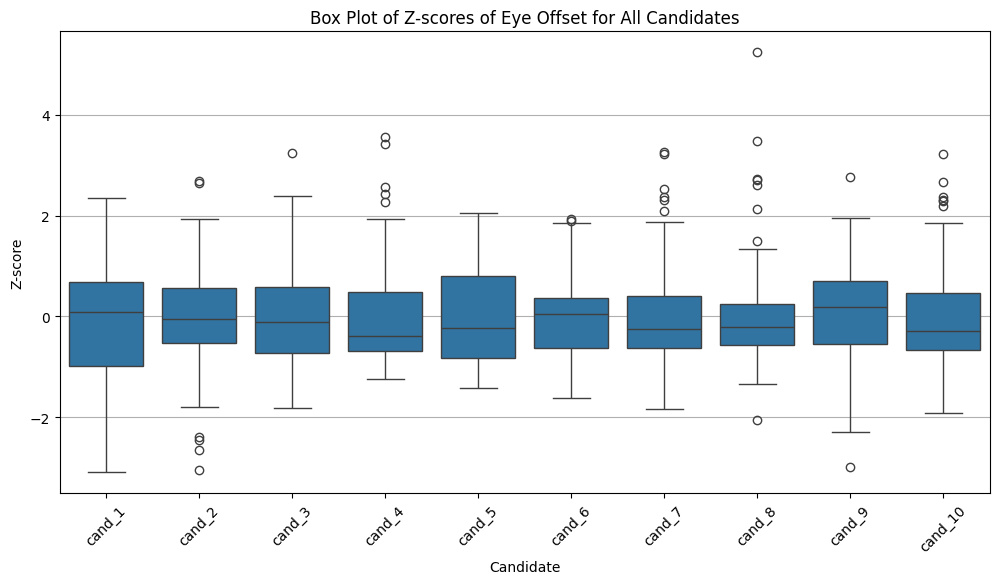

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming normalized_data is already defined and contains the necessary data

# Prepare data for box plot
box_plot_data = []
for candidate_key, df in normalized_data.items():
    for z_score in df['z_score']:
        box_plot_data.append({'Candidate': candidate_key, 'Z-score': z_score})

box_plot_df = pd.DataFrame(box_plot_data)

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Candidate', y='Z-score', data=box_plot_df)
plt.title('Box Plot of Z-scores of Eye Offset for All Candidates')
plt.xlabel('Candidate')
plt.ylabel('Z-score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Spread of Data: The height of the box (IQR) indicates the variability in Z-scores. A smaller box suggests more consistent performance, while a larger box indicates more variability.
Candidates with many outliers may have inconsistent performance, which could be a concern.
Median Z-scores: The median line within each box indicates the central tendency of the Z-scores for each candidate. Candidates with higher median Z-scores generally performed better in terms of eye offset


---
Z-score Plot:

The Z-score plot shows the fluctuations of eye offset over the image sequence. Candidates with Z-scores consistently close to zero are performing better.
cand_3 appears to have a more stable Z-score around zero, indicating less deviation over time.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df2' contains your gaze data

# Calculate blink proportions
blink_proportions = df2.groupby('candidate')['blink'].mean().sort_values(ascending=False)

# Calculate average eye offset
avg_eye_offset = df2.groupby('candidate')['eye_offset'].median().sort_values()



In [ ]:
gaze_proportions = df2.groupby('candidate')['gaze'].mean().sort_values(ascending=False)

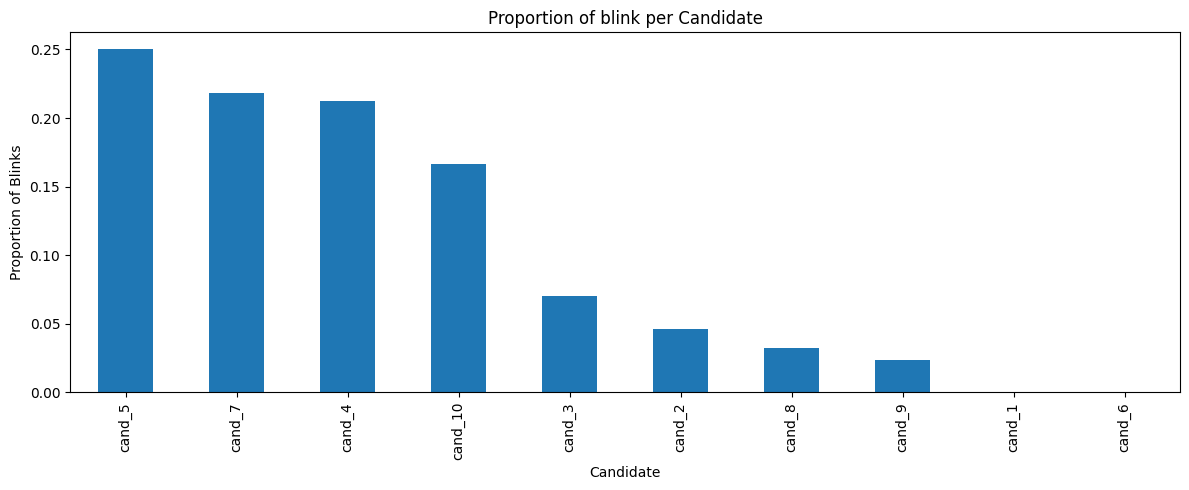

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 1, figsize=(12, 5))  # 1 row, 1 column

# Plot blink proportions
blink_proportions.plot(kind='bar', ax=axes)
axes.set_title('Proportion of blink per Candidate')
axes.set_xlabel('Candidate')  # Fixed this line
axes.set_ylabel('Proportion of Blinks')

# Show the plot
plt.tight_layout()
plt.show()


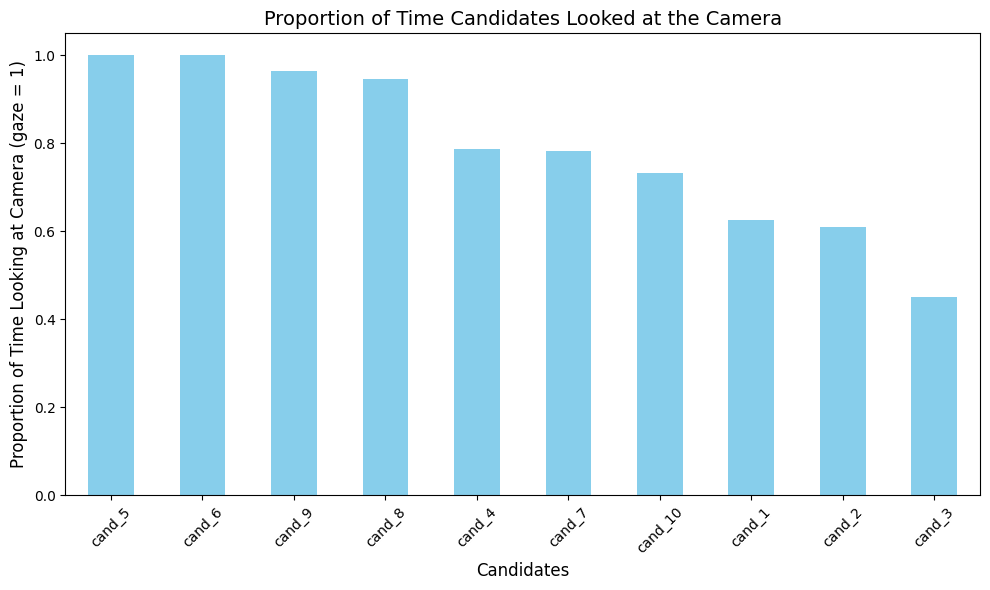

In [335]:


gaze_summary = df2.groupby('candidate')['gaze'].mean()

# Sort candidates by the percentage of time spent looking at the camera
gaze_summary_sorted = gaze_summary.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
gaze_summary_sorted.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Proportion of Time Candidates Looked at the Camera', fontsize=14)
plt.xlabel('Candidates', fontsize=12)
plt.ylabel('Proportion of Time Looking at Camera (gaze = 1)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


candidate 5,6 gaze portion is highest , means they are looking more in camera, but they have less datapoint , apart from this 9,8 has high gaze rate, while 3 has lowest

candidate 6 is perform best , 5 worst

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='candidate', y='elapsed_time', data=df3.reset_index(level='candidate'))
plt.xticks(rotation=45)
plt.title('Comparison of Elapsed Time Across Candidates')
plt.xlabel('Candidate')
plt.ylabel('Elapsed Time')
plt.show()

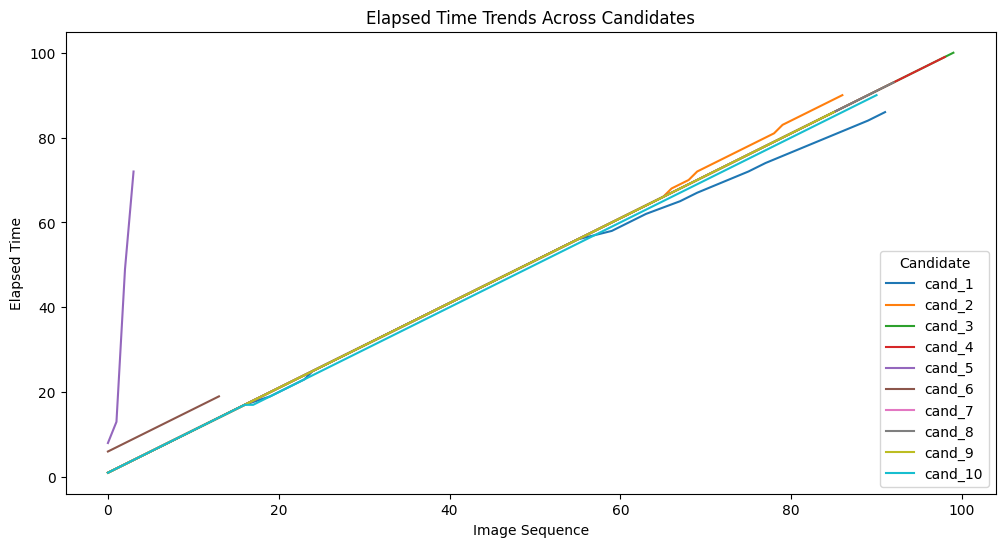

In [336]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df3 is already defined as per your provided data

# Reset index to get 'candidate' as a column
df3_reset = df3.reset_index(level='candidate')

# Create a line plot to show trends over image sequences for each candidate
plt.figure(figsize=(12, 6))
sns.lineplot(x='image_seq', y='elapsed_time', hue='candidate', data=df3_reset)
plt.title('Elapsed Time Trends Across Candidates')
plt.xlabel('Image Sequence')
plt.ylabel('Elapsed Time')
plt.legend(title='Candidate')
plt.show()


In [ ]:
df1.head()

In [ ]:
emotion_new_data

candidate_id  angry_transformed  disgust_transformed  fear_transformed  \
0             1          24.079128             0.722852         26.162708   
1             2          13.662825             0.395368          9.663597   
2             3           2.290224             0.002118         28.648020   
3             4          34.821450             0.001308         22.528208   
4             5          45.753713             0.000059          0.855867   
5             6           0.061362             0.000004          0.478492   
6             7           7.296359             0.157911         47.072547   
7             8          29.166509             0.014749         37.782029   
8             9          11.509094             0.158882         30.247807   
9            10           4.932649             0.051733         39.710481   

   happy_transformed  sad_transformed  surprise_transformed dominant_emotion  \
0          10.324676        27.817562             10.893111              sad   
1          40.876675        32.413035              2.988676            happy   
2          40.229675        17.317976             11.511491            happy   
3           8.067421        19.600054             14.986195            angry   
4          39.855883        12.846439              0.682297            angry   
5          93.398613         6.041549              0.020179            happy   
6          10.397122        30.794959              4.281096             fear   
7          11.190179        16.522762              5.323702             fear   
8          23.176652        14.265014             20.642551             fear   
9           5.178859        45.406314              4.719878              sad   

   dominance_percentage  
0             31.034483  
1             45.977011  
2             44.000000  
3             38.383838  
4             50.000000  
5            100.000000  
6             47.126437  
7             46.236559  
8             34.883721  
9             50.000000

In [ ]:
sentiment_df

candidate_id  positive  negative   neutral
0           10  0.589267  0.220948  0.189785
1            7  0.717354  0.140232  0.142414
2            6  0.711182  0.138992  0.149826
3            1  0.709199  0.141214  0.149586
4            3  0.567257  0.264337  0.168406
5            4  0.655748  0.169142  0.175110
6            8  0.605402  0.192292  0.202306
7            5  0.630573  0.187013  0.182414
8            9  0.617353  0.223949  0.158699
9            2  0.722006  0.107541  0.170453

In [ ]:
speech_speed_df

candidate_id  speech_speed
0           10      3.248518
1            7      2.284897
2            6      2.583163
3            1      3.113771
4            3      3.385636
5            4      2.775454
6            8      2.902953
7            5      2.817341
8            9      3.329938
9            2      3.269092

In [ ]:
transcript_emo

candidate_id  confident  hesitant   concise  enthusiastic
0           10   0.619852  0.520637  0.385655      0.325507
1            7   0.703714  0.457070  0.398571      0.463940
2            6   0.679755  0.490252  0.367792      0.481433
3            1   0.733828  0.485172  0.429418      0.466497
4            3   0.573566  0.604004  0.394715      0.448050
5            4   0.621740  0.570452  0.403479      0.440626
6            8   0.555011  0.507622  0.352011      0.437399
7            5   0.590094  0.461488  0.413644      0.378110
8            9   0.591842  0.538732  0.381809      0.505152
9            2   0.684879  0.436158  0.484221      0.516685

In [ ]:
gaze_final_df

candidate_id     blink      gaze  eye_offset
0             1  0.000000  0.625000    19.69410
1             2  0.045977  0.609195    20.37000
2             3  0.070000  0.450000    27.99405
3             4  0.212121  0.787879     4.54640
4             5  0.250000  1.000000   -16.10130
5             6  0.000000  1.000000    -1.67215
6             7  0.218391  0.781609     1.37260
7             8  0.032258  0.946237     3.91730
8             9  0.023256  0.965116     9.29725
9            10  0.166667  0.733333     4.15695

In [337]:
# Convert 'candidate_id' to a consistent data type (e.g., string) in all DataFrames
gaze_final_df['candidate_id'] = gaze_final_df['candidate_id'].astype(int)
transcript_emo['candidate_id'] = transcript_emo['candidate_id'].astype(int)
sentiment_df['candidate_id'] = sentiment_df['candidate_id'].astype(int)
speech_speed_df['candidate_id'] = speech_speed_df['candidate_id'].astype(int)

merged_df = gaze_final_df.merge(transcript_emo, on='candidate_id') \
               .merge(sentiment_df, on='candidate_id') \
               .merge(speech_speed_df, on='candidate_id')\
               .merge(emotion_new_data, on='candidate_id')

In [ ]:
merged_df

candidate_id     blink      gaze  eye_offset  confident  hesitant  \
0             1  0.000000  0.625000    19.69410   0.733828  0.485172   
1             2  0.045977  0.609195    20.37000   0.684879  0.436158   
2             3  0.070000  0.450000    27.99405   0.573566  0.604004   
3             4  0.212121  0.787879     4.54640   0.621740  0.570452   
4             5  0.250000  1.000000   -16.10130   0.590094  0.461488   
5             6  0.000000  1.000000    -1.67215   0.679755  0.490252   
6             7  0.218391  0.781609     1.37260   0.703714  0.457070   
7             8  0.032258  0.946237     3.91730   0.555011  0.507622   
8             9  0.023256  0.965116     9.29725   0.591842  0.538732   
9            10  0.166667  0.733333     4.15695   0.619852  0.520637   

    concise  enthusiastic  positive  negative   neutral  speech_speed  \
0  0.429418      0.466497  0.709199  0.141214  0.149586      3.113771   
1  0.484221      0.516685  0.722006  0.107541  0.170453      3.269092   
2  0.394715      0.448050  0.567257  0.264337  0.168406      3.385636   
3  0.403479      0.440626  0.655748  0.169142  0.175110      2.775454   
4  0.413644      0.378110  0.630573  0.187013  0.182414      2.817341   
5  0.367792      0.481433  0.711182  0.138992  0.149826      2.583163   
6  0.398571      0.463940  0.717354  0.140232  0.142414      2.284897   
7  0.352011      0.437399  0.605402  0.192292  0.202306      2.902953   
8  0.381809      0.505152  0.617353  0.223949  0.158699      3.329938   
9  0.385655      0.325507  0.589267  0.220948  0.189785      3.248518   

   angry_transformed  disgust_transformed  fear_transformed  \
0          24.079128             0.722852         26.162708   
1          13.662825             0.395368          9.663597   
2           2.290224             0.002118         28.648020   
3          34.821450             0.001308         22.528208   
4          45.753713             0.000059          0.855867   
5           0.061362             0.000004          0.478492   
6           7.296359             0.157911         47.072547   
7          29.166509             0.014749         37.782029   
8          11.509094             0.158882         30.247807   
9           4.932649             0.051733         39.710481   

   happy_transformed  sad_transformed  surprise_transformed dominant_emotion  \
0          10.324676        27.817562             10.893111              sad   
1          40.876675        32.413035              2.988676            happy   
2          40.229675        17.317976             11.511491            happy   
3           8.067421        19.600054             14.986195            angry   
4          39.855883        12.846439              0.682297            angry   
5          93.398613         6.041549              0.020179            happy   
6          10.397122        30.794959              4.281096             fear   
7          11.190179        16.522762              5.323702             fear   
8          23.176652        14.265014             20.642551             fear   
9           5.178859        45.406314              4.719878              sad   

   dominance_percentage  
0             31.034483  
1             45.977011  
2             44.000000  
3             38.383838  
4             50.000000  
5            100.000000  
6             47.126437  
7             46.236559  
8             34.883721  
9             50.000000

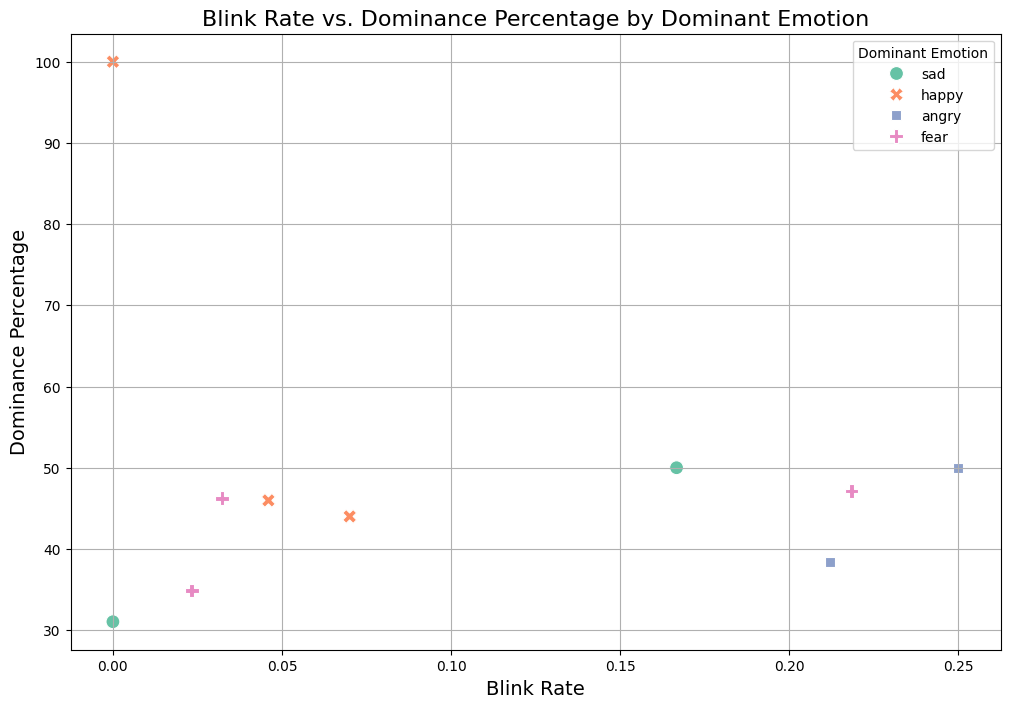

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# Set up the figure
plt.figure(figsize=(12, 8))

# Scatter plot with hue for dominant emotion
sns.scatterplot(
    data=merged_df,
    x='blink',
    y='dominance_percentage',
    hue='dominant_emotion',
    style='dominant_emotion',
    palette='Set2',
    s=100
)

# Title and labels
plt.title('Blink Rate vs. Dominance Percentage by Dominant Emotion', fontsize=16)
plt.xlabel('Blink Rate', fontsize=14)
plt.ylabel('Dominance Percentage', fontsize=14)

# Show legend
plt.legend(title='Dominant Emotion', loc='upper right')

# Display the plot
plt.grid(True)
plt.show()


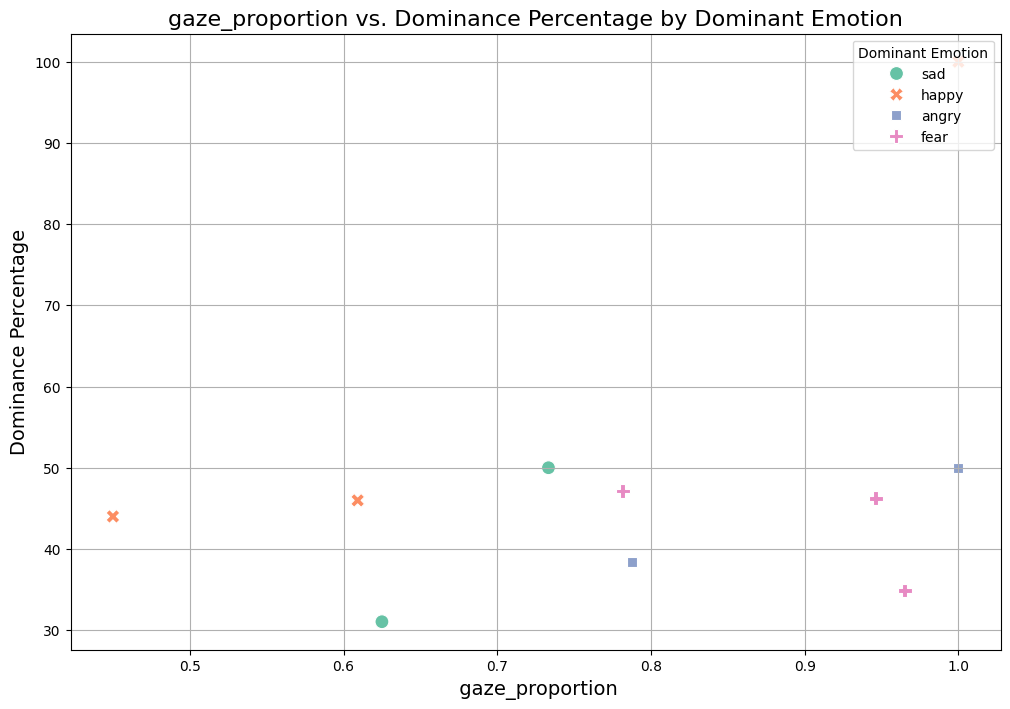

In [ ]:
# Set up the figure
plt.figure(figsize=(12, 8))

# Scatter plot with hue for dominant emotion
sns.scatterplot(
    data=merged_df,
    x='gaze',
    y='dominance_percentage',
    hue='dominant_emotion',
    style='dominant_emotion',
    palette='Set2',
    s=100
)

# Title and labels
plt.title('gaze_proportion vs. Dominance Percentage by Dominant Emotion', fontsize=16)
plt.xlabel(' gaze_proportion', fontsize=14)
plt.ylabel('Dominance Percentage', fontsize=14)

# Show legend
plt.legend(title='Dominant Emotion', loc='upper right')

# Display the plot
plt.grid(True)
plt.show()

This graph expressed the realtion between gaze_portion( candidate looking at the camera all over the video) v/s dominant emotion.
we can conclude from this graph that the emotions(fear ,angry) dominats when gaze portion is high  which happy dominates when gaze portion is low or on average scale,

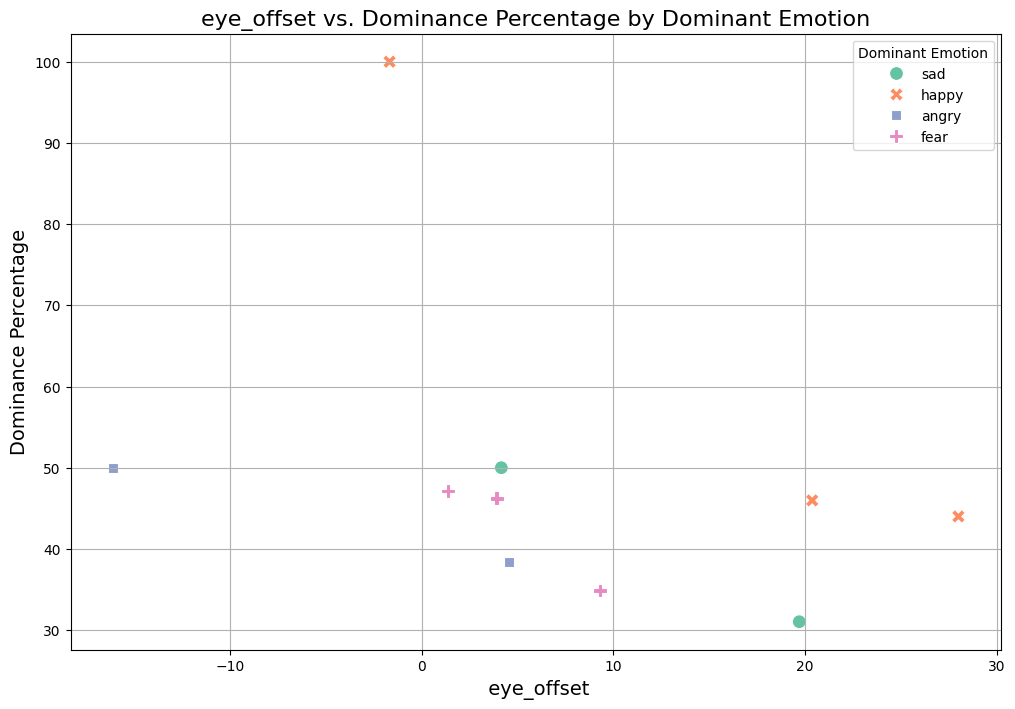

In [ ]:
# Set up the figure
plt.figure(figsize=(12, 8))

# Scatter plot with hue for dominant emotion
sns.scatterplot(
    data=merged_df,
    x='eye_offset',
    y='dominance_percentage',
    hue='dominant_emotion',
    style='dominant_emotion',
    palette='Set2',
    s=100
)

# Title and labels
plt.title('eye_offset vs. Dominance Percentage by Dominant Emotion', fontsize=16)
plt.xlabel(' eye_offset', fontsize=14)
plt.ylabel('Dominance Percentage', fontsize=14)

# Show legend
plt.legend(title='Dominant Emotion', loc='upper right')

# Display the plot
plt.grid(True)
plt.show()

happy emotion dominant generally when eyeoffcet is high, the negative emotions dominates when eye off set is generally medium, (candidate is not deviating)

<ipython-input-257-f584e767b876>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


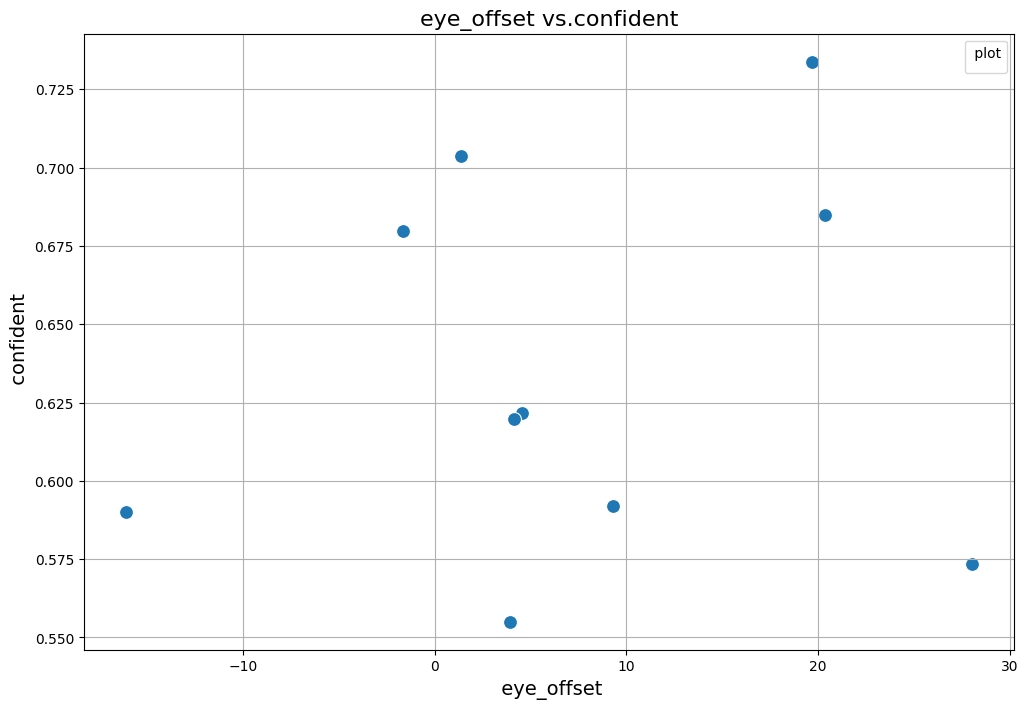

In [ ]:
# Set up the figure
plt.figure(figsize=(12, 8))

# Scatter plot with hue for dominant emotion
sns.scatterplot(
    data=merged_df,
    x='eye_offset',
    y='confident',

    palette='Set2',
    s=100
)

# Title and labels
plt.title('eye_offset vs.confident', fontsize=16)
plt.xlabel(' eye_offset', fontsize=14)
plt.ylabel(' confident', fontsize=14)

# Show legend
plt.legend(title=' plot', loc='upper right')

# Display the plot
plt.grid(True)
plt.show()

when candidate has medium eye_offset(not deviating) he/she has more confident

In [348]:
import os

data = []

folder_path = '/content/drive/MyDrive/I m besides you task'

# Loop to read 10 text files
for i in range(1, 11):
    dir_name = str(i)
    file_name=dir_name+'.txt'
    file_path = os.path.join(folder_path, 'transcripts-20240903T095324Z-001', 'transcripts',file_name)

    # Check if the file exists
    if os.path.exists(file_path):
        # Open the file and read its contents
        with open(file_path, 'r') as file:
            text = file.read()
            data.append(text)



[' Hello, I am Jeffrey Shepherd and I am currently pursuing postgraduate and management from  IIM Coikode. I have completed my B.Tech in Biotechnology from Heritage Institute of  Technology Kolkata, followed by my M.Tech from IIT Kharagpur. I come with an experience  of three years in the regulatory affairs domain of the pharmaceutical industry and I worked  as a medical writer in Ciro Klein Farm, Mumbai and have specialized in drug safety and risk  management. What sets me apart is the expertise I bring in with my three years of experience  and an added two years of postgraduation. Along with this, I add another dimension to  the discussion with my background in biotechnology. An added advantage is my ability to pay attention  to detail, which is well testamented in my research work and patents, publication and  the best research award which my work at IIT Kharagpur has received. After my 12th, I developed  a keen interest in baking and over time this has transitioned from a mere hobb

In [349]:
len(data)

10

In [350]:
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')
nltk.download('punkt')
# Now you can use the Sentiment Intensity Analyzer
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [351]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize NLTK's Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Function to clean and tokenize text
def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    words = nltk.word_tokenize(text.lower())
    words = [word for word in words if word.isalnum()]  # Keep only alphanumeric words
    return words

# Preprocess all introductions
tokenized_data = [preprocess_text(intro) for intro in data]

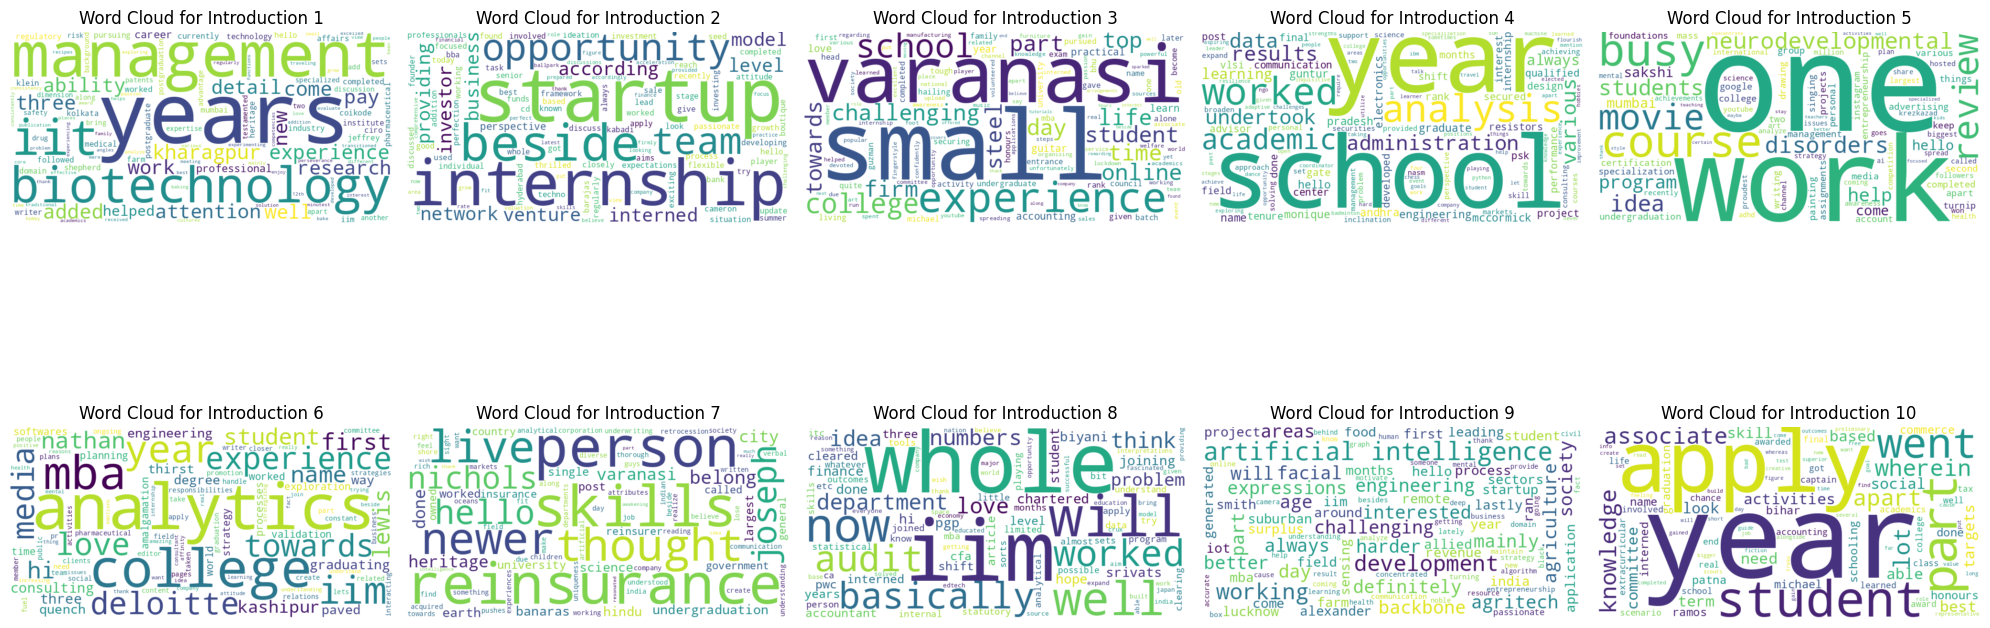

In [352]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure there are at least 10 introductions
num_plots = min(10, len(tokenized_data))  # Handle cases where there might be fewer than 10 introductions

# Set up the figure and subplot layout
plt.figure(figsize=(20, 10))  # Adjust the size to accommodate 10 subplots

for i in range(num_plots):
    # Select the introduction and join the tokenized words into a single string
    text = tokenized_data[i]
    text_string = ' '.join(text)

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_string)

    # Plot the word cloud
    plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns layout for 10 plots
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Introduction {i + 1}')

# Adjust layout and display all plots
plt.tight_layout()
plt.show()

      Person  Sentiment Score
0   Person 1           0.9914
1   Person 2           0.9927
2   Person 3           0.9964
3   Person 4           0.9870
4   Person 5           0.9862
5   Person 6           0.9752
6   Person 7           0.9201
7   Person 8           0.9827
8   Person 9           0.9929
9  Person 10           0.9905


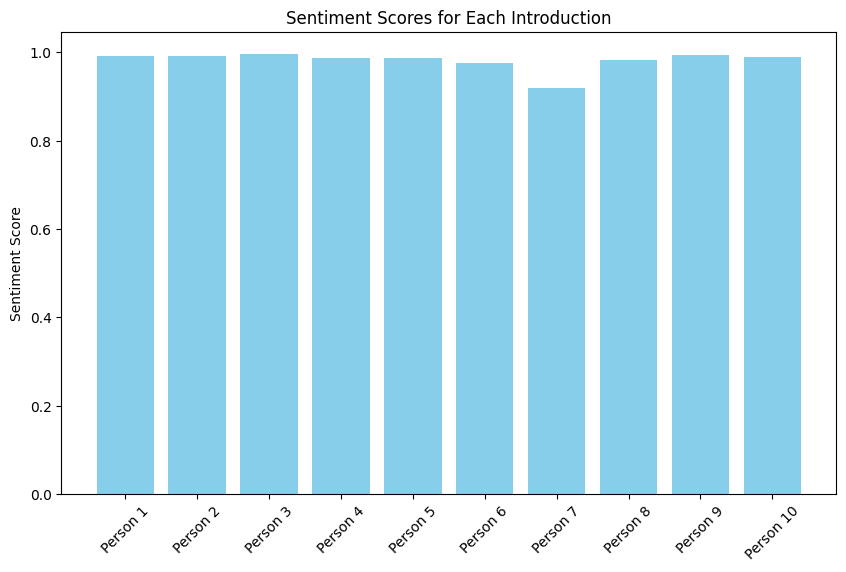

In [353]:
def preprocess_text(tokens):
    return ' '.join(tokens)

# Get sentiment scores for each introduction
sentiment_scores = [sia.polarity_scores(preprocess_text(intro)) for intro in tokenized_data]

# Extract overall compound sentiment (ranges from -1 to 1)
compound_scores = [score['compound'] for score in sentiment_scores]

# Display sentiment results
sentiment_df = pd.DataFrame({
    'Person': [f'Person {i+1}' for i in range(len(tokenized_data))],
    'Sentiment Score': compound_scores
})

print(sentiment_df)

# Plot sentiment scores
plt.figure(figsize=(10, 6))
plt.bar(sentiment_df['Person'], sentiment_df['Sentiment Score'], color='skyblue')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores for Each Introduction')
plt.xticks(rotation=45)
plt.show()

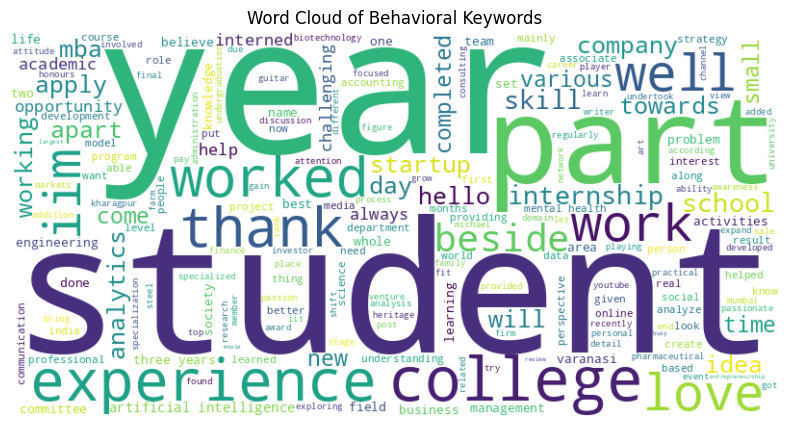

In [354]:
from wordcloud import WordCloud

# Concatenate all tokenized texts into a single string
all_text = ' '.join([' '.join(text) for text in tokenized_data])

# Generate word cloud for behavioral keywords
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Behavioral Keywords')
plt.show()
#Overall Data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


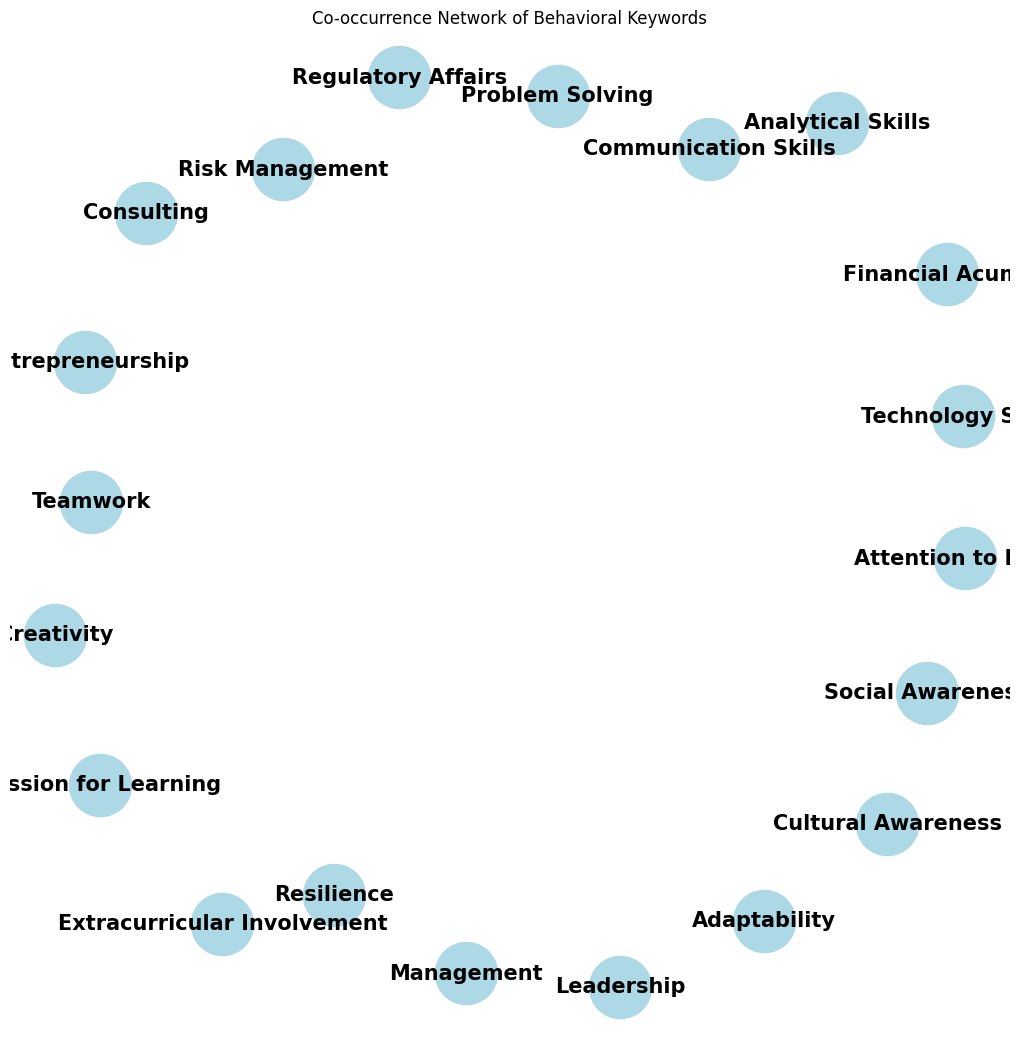

In [355]:
import networkx as nx  # For creating and managing graphs
import matplotlib.pyplot as plt  # For visualizing the graph
from nltk.tokenize import word_tokenize  # For tokenizing text into words (if needed)
from nltk.corpus import stopwords  # For filtering out common stopwords
import nltk

# Download necessary NLTK data files (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
import networkx as nx

# Create a co-occurrence graph
G = nx.Graph()
behavioral_keywords = [
    "Leadership",
    "Analytical Skills",
    "Teamwork",
    "Problem Solving",
    "Attention to Detail",
    "Entrepreneurship",
    "Adaptability",
    "Communication Skills",
    "Management",
    "Creativity",
    "Risk Management",
    "Consulting",
    "Technology Skills",
    "Regulatory Affairs",
    "Passion for Learning",
    "Financial Acumen",
    "Cultural Awareness",
    "Extracurricular Involvement",
    "Resilience",
    "Social Awareness"
]

# Add nodes for each keyword
G.add_nodes_from(behavioral_keywords)
# Add edges based on co-occurrence
for text in tokenized_data:
    for i, word1 in enumerate(text):
        for word2 in text[i + 1:]:
            if word1 in behavioral_keywords and word2 in behavioral_keywords:
                if G.has_edge(word1, word2):
                    G[word1][word2]['weight'] += 1
                else:
                    G.add_edge(word1, word2, weight=1)

# Draw the network
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', edge_color='gray', font_size=15, font_weight='bold', width=[G[u][v]['weight']*0.1 for u,v in G.edges()])
plt.title('Co-occurrence Network of Behavioral Keywords')
plt.show()


In [356]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment for each introduction
sentiment_scores = [sia.polarity_scores(intro) for intro in data]
compound_scores = [score['compound'] for score in sentiment_scores]


# Create DataFrame with normalized sentiment scores
quality_df = pd.DataFrame({
    'Person': [f'Person {i+1}' for i in range(len(tokenized_data))],
    'Sentiment Score': compound_scores,

})

print(quality_df)



      Person  Sentiment Score
0   Person 1           0.9914
1   Person 2           0.9925
2   Person 3           0.9964
3   Person 4           0.9870
4   Person 5           0.9862
5   Person 6           0.9760
6   Person 7           0.9201
7   Person 8           0.9827
8   Person 9           0.9929
9  Person 10           0.9905


In [357]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.0 MB/s eta 0:00:00


In [358]:
import pandas as pd
from textstat import flesch_kincaid_grade

# Calculate readability score for each introduction
readability_scores = [flesch_kincaid_grade(' '.join(text)) for text in tokenized_data]


# Create DataFrame with normalized readability scores
readability_df = pd.DataFrame({
    'Person': [f'Person {i+1}' for i in range(len(tokenized_data))],
    'Readability Score': readability_scores
})

print(readability_df)
readability_df.to_csv('readability.csv')

      Person  Readability Score
0   Person 1              107.4
1   Person 2              116.4
2   Person 3              133.5
3   Person 4              108.6
4   Person 5               82.1
5   Person 6               90.7
6   Person 7               77.4
7   Person 8               98.4
8   Person 9              100.8
9  Person 10              109.7


In [359]:
import pandas as pd

# Function to compute vocabulary richness
def compute_vocabulary_richness(text):
    words = [word for word in text if word.isalpha()]
    unique_words = set(words)
    return len(unique_words) / len(words) if words else 0

# Compute vocabulary richness for each introduction
richness_scores = [compute_vocabulary_richness(text) for text in tokenized_data]



# Create DataFrame with normalized vocabulary richness
richness_df = pd.DataFrame({
    'Person': [f'Person {i+1}' for i in range(len(tokenized_data))],
    'Vocabulary Richness': richness_scores,

})

print(richness_df)


      Person  Vocabulary Richness
0   Person 1             0.556391
1   Person 2             0.520548
2   Person 3             0.536873
3   Person 4             0.613383
4   Person 5             0.686275
5   Person 6             0.616071
6   Person 7             0.658031
7   Person 8             0.582329
8   Person 9             0.548387
9  Person 10             0.516014


In [360]:


# Create the new DataFrame with candidate_id and vocabulary richness
new_data = {
    'candidate_id': range(1, 11),
    'vocabulary_richness': richness_df['Vocabulary Richness']
}

# Convert new data to a DataFrame
vocab_df = pd.DataFrame(new_data)


In [361]:
vocab_df

candidate_id  vocabulary_richness
0             1             0.556391
1             2             0.520548
2             3             0.536873
3             4             0.613383
4             5             0.686275
5             6             0.616071
6             7             0.658031
7             8             0.582329
8             9             0.548387
9            10             0.516014

In [ ]:
merged_df = merged_df.merge(vocab_df, on='candidate_id')

In [ ]:
merged_df

candidate_id     blink      gaze  eye_offset  confident  hesitant  \
0             1  0.000000  0.625000    19.69410   0.733828  0.485172   
1             2  0.045977  0.609195    20.37000   0.684879  0.436158   
2             3  0.070000  0.450000    27.99405   0.573566  0.604004   
3             4  0.212121  0.787879     4.54640   0.621740  0.570452   
4             5  0.250000  1.000000   -16.10130   0.590094  0.461488   
5             6  0.000000  1.000000    -1.67215   0.679755  0.490252   
6             7  0.218391  0.781609     1.37260   0.703714  0.457070   
7             8  0.032258  0.946237     3.91730   0.555011  0.507622   
8             9  0.023256  0.965116     9.29725   0.591842  0.538732   
9            10  0.166667  0.733333     4.15695   0.619852  0.520637   

    concise  enthusiastic  positive  negative  ...  speech_speed  \
0  0.429418      0.466497  0.709199  0.141214  ...      3.113771   
1  0.484221      0.516685  0.722006  0.107541  ...      3.269092   
2  0.394715      0.448050  0.567257  0.264337  ...      3.385636   
3  0.403479      0.440626  0.655748  0.169142  ...      2.775454   
4  0.413644      0.378110  0.630573  0.187013  ...      2.817341   
5  0.367792      0.481433  0.711182  0.138992  ...      2.583163   
6  0.398571      0.463940  0.717354  0.140232  ...      2.284897   
7  0.352011      0.437399  0.605402  0.192292  ...      2.902953   
8  0.381809      0.505152  0.617353  0.223949  ...      3.329938   
9  0.385655      0.325507  0.589267  0.220948  ...      3.248518   

   angry_transformed  disgust_transformed  fear_transformed  \
0          24.079128             0.722852         26.162708   
1          13.662825             0.395368          9.663597   
2           2.290224             0.002118         28.648020   
3          34.821450             0.001308         22.528208   
4          45.753713             0.000059          0.855867   
5           0.061362             0.000004          0.478492   
6           7.296359             0.157911         47.072547   
7          29.166509             0.014749         37.782029   
8          11.509094             0.158882         30.247807   
9           4.932649             0.051733         39.710481   

   happy_transformed  sad_transformed  surprise_transformed  dominant_emotion  \
0          10.324676        27.817562             10.893111               sad   
1          40.876675        32.413035              2.988676             happy   
2          40.229675        17.317976             11.511491             happy   
3           8.067421        19.600054             14.986195             angry   
4          39.855883        12.846439              0.682297             angry   
5          93.398613         6.041549              0.020179             happy   
6          10.397122        30.794959              4.281096              fear   
7          11.190179        16.522762              5.323702              fear   
8          23.176652        14.265014             20.642551              fear   
9           5.178859        45.406314              4.719878               sad   

  dominance_percentage  vocabulary_richness  
0            31.034483             0.556391  
1            45.977011             0.520548  
2            44.000000             0.536873  
3            38.383838             0.613383  
4            50.000000             0.686275  
5           100.000000             0.616071  
6            47.126437             0.658031  
7            46.236559             0.582329  
8            34.883721             0.548387  
9            50.000000             0.516014  

[10 rows x 21 columns]

In [ ]:


# Assuming `combined_df` is your DataFrame
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Apply sigmoid normalization to `speech_speed` and `eye_offset`
merged_df['speech_speed_normalized'] = sigmoid(merged_df['speech_speed'])
merged_df['eye_offset_normalized'] = sigmoid(merged_df['eye_offset'])

# Normalize transformed emotion features by dividing by 100
transformed_features = ['angry_transformed', 'disgust_transformed', 'fear_transformed',
                         'happy_transformed', 'sad_transformed', 'surprise_transformed']

for feature in transformed_features:
    merged_df[f'{feature}_normalized'] = merged_df[feature] / 100

# Drop the original columns if not needed
merged_df = merged_df.drop(columns=transformed_features + ['speech_speed', 'eye_offset'])

# Display the updated DataFm


In [ ]:
merged_df


candidate_id     blink      gaze  confident  hesitant   concise  \
0             1  0.000000  0.625000   0.733828  0.485172  0.429418   
1             2  0.045977  0.609195   0.684879  0.436158  0.484221   
2             3  0.070000  0.450000   0.573566  0.604004  0.394715   
3             4  0.212121  0.787879   0.621740  0.570452  0.403479   
4             5  0.250000  1.000000   0.590094  0.461488  0.413644   
5             6  0.000000  1.000000   0.679755  0.490252  0.367792   
6             7  0.218391  0.781609   0.703714  0.457070  0.398571   
7             8  0.032258  0.946237   0.555011  0.507622  0.352011   
8             9  0.023256  0.965116   0.591842  0.538732  0.381809   
9            10  0.166667  0.733333   0.619852  0.520637  0.385655   

   enthusiastic  positive  negative   neutral  ... dominance_percentage  \
0      0.466497  0.709199  0.141214  0.149586  ...            31.034483   
1      0.516685  0.722006  0.107541  0.170453  ...            45.977011   
2      0.448050  0.567257  0.264337  0.168406  ...            44.000000   
3      0.440626  0.655748  0.169142  0.175110  ...            38.383838   
4      0.378110  0.630573  0.187013  0.182414  ...            50.000000   
5      0.481433  0.711182  0.138992  0.149826  ...           100.000000   
6      0.463940  0.717354  0.140232  0.142414  ...            47.126437   
7      0.437399  0.605402  0.192292  0.202306  ...            46.236559   
8      0.505152  0.617353  0.223949  0.158699  ...            34.883721   
9      0.325507  0.589267  0.220948  0.189785  ...            50.000000   

   vocabulary_richness  speech_speed_normalized  eye_offset_normalized  \
0             0.556391                 0.957457           1.000000e+00   
1             0.520548                 0.963353           1.000000e+00   
2             0.536873                 0.967253           1.000000e+00   
3             0.613383                 0.941335           9.895060e-01   
4             0.686275                 0.943606           1.016937e-07   
5             0.616071                 0.929770           1.581377e-01   
6             0.658031                 0.907618           7.977999e-01   
7             0.582329                 0.947992           9.804933e-01   
8             0.548387                 0.965442           9.999083e-01   
9             0.516014                 0.962620           9.845861e-01   

   angry_transformed_normalized  disgust_transformed_normalized  \
0                      0.240791                    7.228523e-03   
1                      0.136628                    3.953677e-03   
2                      0.022902                    2.118383e-05   
3                      0.348214                    1.307539e-05   
4                      0.457537                    5.900639e-07   
5                      0.000614                    3.853133e-08   
6                      0.072964                    1.579113e-03   
7                      0.291665                    1.474876e-04   
8                      0.115091                    1.588821e-03   
9                      0.049326                    5.173317e-04   

   fear_transformed_normalized  happy_transformed_normalized  \
0                     0.261627                      0.103247   
1                     0.096636                      0.408767   
2                     0.286480                      0.402297   
3                     0.225282                      0.080674   
4                     0.008559                      0.398559   
5                     0.004785                      0.933986   
6                     0.470725                      0.103971   
7                     0.377820                      0.111902   
8                     0.302478                      0.231767   
9                     0.397105                      0.051789   

   sad_transformed_normalized  surprise_transformed_normalized  
0                    0.278176                         0.108931  
1                 

In [ ]:
# prompt: save merged data to csv

merged_df.to_csv('merged_data.csv', index=False)


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   candidate_id                     10 non-null     int64  
 1   blink                            10 non-null     float64
 2   gaze                             10 non-null     float64
 3   confident                        10 non-null     float64
 4   hesitant                         10 non-null     float64
 5   concise                          10 non-null     float64
 6   enthusiastic                     10 non-null     float64
 7   positive                         10 non-null     float64
 8   negative                         10 non-null     float64
 9   neutral                          10 non-null     float64
 10  dominant_emotion                 10 non-null     object 
 11  dominance_percentage             10 non-null     float64
 12  vocabulary_richness      

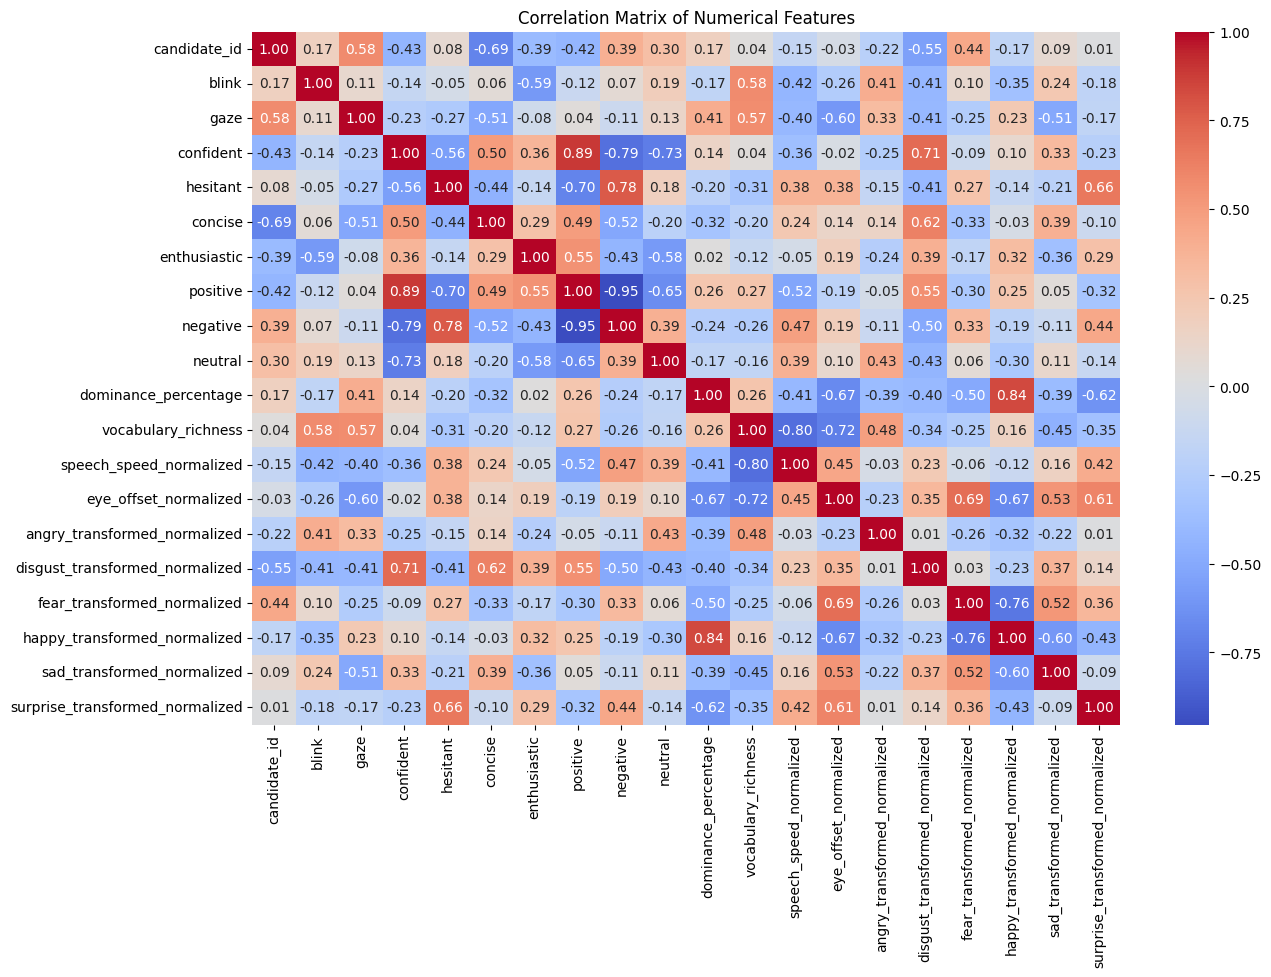

In [ ]:
# prompt: correlation matrix for merged df only on numerical coloumns  plot the heatmap

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_cols = merged_df.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
corr_matrix = merged_df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(14,9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


<ipython-input-278-6c1cd82dd9f4>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Candidate', y='Weighted Score', data=weighted_scores_df, palette='viridis')


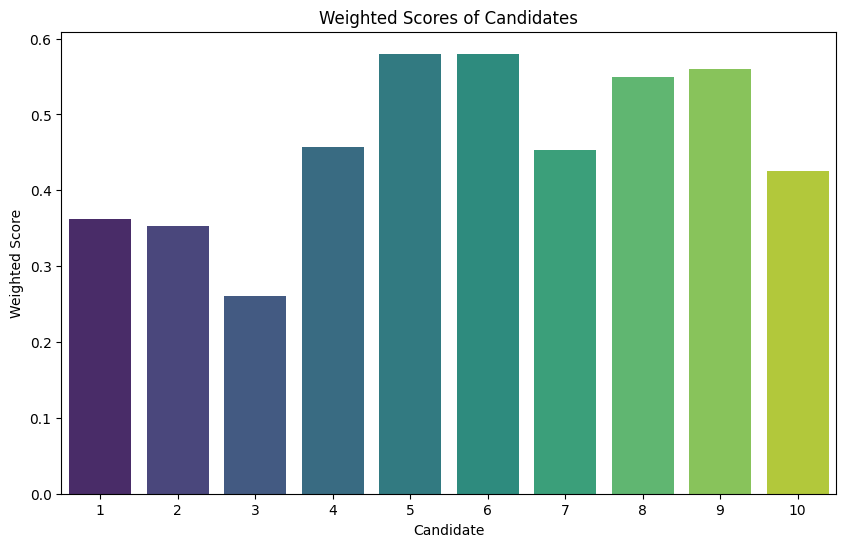

   Candidate  Weighted Score
4          5        0.580000
5          6        0.580000
8          9        0.559767
7          8        0.548817
3          4        0.456970
6          7        0.453333
9         10        0.425333
0          1        0.362500
1          2        0.353333
2          3        0.261000


In [278]:
# Define weights for each feature based on their correlation with the target (e.g., confidence or dominance)
# You can manually set the weights based on correlation values or automate it
weights = {

    'gaze': 0.58,
    'confident': 0.58,
    'hesitant': -0.4,
    'concise': 0.3,
    'enthusiastic': 0.42,
    'positive': 0.65,
    'negative': -0.79,
    'neutral': 0.01,

    'vocabulary_richness': 0.72,
    'speech_speed_normalized': 0.05,
    'eye_offset_normalized': 0.03,
    'angry_transformed_normalized': -0.41,
    'disgust_transformed_normalized': -0.23,
    'fear_transformed_normalized': -0.60,
    'happy_transformed_normalized': 0.65,
    'sad_transformed_normalized': -0.35,
    'surprise_transformed_normalized': -0.2
}

# Calculate weighted sum for each candidate
weighted_scores = {}

for candidate, df in combined_df.groupby('candidate_id'):
    # Multiply each feature by its corresponding weight and sum the result for each candidate
    weighted_sum = sum(df[feature].mean() * weight for feature, weight in weights.items() if feature in df.columns)
    weighted_scores[candidate] = weighted_sum

# Convert weighted_scores to a DataFrame for analysis and ranking
weighted_scores_df = pd.DataFrame(list(weighted_scores.items()), columns=['Candidate', 'Weighted Score'])

# Sort candidates by their weighted score to identify the best one
weighted_scores_df = weighted_scores_df.sort_values(by='Weighted Score', ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Candidate', y='Weighted Score', data=weighted_scores_df, palette='viridis')
plt.title('Weighted Scores of Candidates')
plt.ylabel('Weighted Score')
plt.xlabel('Candidate')
plt.show()

# Display the DataFrame
print(weighted_scores_df)
